# **Etude de marché _ La Poule Qui Chante**

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import sklearn as sk
import scipy as sp
import pca as pca
import numpy     

In [17]:

from matplotlib.collections import LineCollection
import numpy as np
from scipy.cluster.hierarchy import dendrogram

def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7,6))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
        
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(7,6))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)




In [18]:

from matplotlib.collections import LineCollection
import numpy as np
from scipy.cluster.hierarchy import dendrogram

def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7,6))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
        
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(7,6))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)




In [19]:
# Formatage 

#separateur milliers
pd.options.display.float_format = '{:,.2f}'.format

# Couleurs
red_a400 = '#ff1744'
indigo_a100 = '#8c9eff'
indigo_a400 = '#3d5afe'
indigo_a700 = '#304ffe'
bluegrey_900 = '#263238'
teal_a400 = '#1de9b6'
purple_a400 = '#d500f9'
yellow_a400 = '#ffea00'
bluegrey_900 = '#263238'
palette_5 = [teal_a400, indigo_a400, red_a400, yellow_a400, purple_a400]


# Importation df

In [20]:
df = pd.read_csv(r'C:\Users\melle\FORMATION\P9_MENDY_Angèle\df.csv', delimiter=",").drop("Unnamed: 0", axis=1)
df = df.rename(columns={"TO":"Taux_ouverture"})
#df_final = df_final.set_index("Pays")
df.head()

,Pays,%_Evolutipon_population_2012/17,Croissance_annuelle,PIB/hab,Performance_logistique,TDI,Stabilité_politique_12_17,%Importation_Volailles,%Production_Volailles,%Volailles disponibilité de proteines,Taux_ouverture,Disponibilité_protéines
0,Afghanistan,16.48,0.65,513.09,1.99,12.18,-2.57,100.00,13.40,22.78,2.83,2.37
1,Afrique du Sud,7.91,16.11,"6,121.88",3.54,26.13,-0.14,71.19,65.53,80.31,10.01,17.57
2,Albanie,-1.03,9.85,"4,514.20",2.48,56.48,0.25,62.30,23.64,47.79,0.76,13.10
3,Algérie,10.71,4.14,"4,109.70",2.45,7.94,-1.14,3.51,41.54,35.24,0.71,5.59
4,Allemagne,2.08,5.61,"44,552.06",4.13,52.56,0.77,23.75,20.60,31.22,8.63,25.50


In [21]:
df.columns

Index(['Pays', '%_Evolutipon_population_2012/17', 'Croissance_annuelle',
       'PIB/hab', 'Performance_logistique', 'TDI', 'Stabilité_politique_12_17',
       '%Importation_Volailles', '%Production_Volailles',
       '%Volailles disponibilité de proteines', 'Taux_ouverture',
       'Disponibilité_protéines'],
      dtype='object')

In [22]:
df = df[['Pays', '%_Evolutipon_population_2012/17', 'Croissance_annuelle',
         'PIB/hab', 'Performance_logistique', 'TDI', 'Stabilité_politique_12_17', 
         '%Production_Volailles', 'Taux_ouverture']]

In [23]:
df_final = pd.DataFrame.copy(df)
df_final

,Pays,%_Evolutipon_population_2012/17,Croissance_annuelle,PIB/hab,Performance_logistique,TDI,Stabilité_politique_12_17,%Production_Volailles,Taux_ouverture
0,Afghanistan,16.48,0.65,513.09,1.99,12.18,-2.57,13.40,2.83
1,Afrique du Sud,7.91,16.11,"6,121.88",3.54,26.13,-0.14,65.53,10.01
2,Albanie,-1.03,9.85,"4,514.20",2.48,56.48,0.25,23.64,0.76
3,Algérie,10.71,4.14,"4,109.70",2.45,7.94,-1.14,41.54,0.71
4,Allemagne,2.08,5.61,"44,552.06",4.13,52.56,0.77,20.60,8.63
...,...,...,...,...,...,...,...,...,...
167,Émirats arabes unis,3.78,6.56,"40,644.80",3.76,96.75,0.74,28.92,1.02
168,Équateur,8.47,2.53,"6,213.50",2.75,10.47,0.33,28.55,5.51
169,États-Unis d'Amérique,3.52,3.59,"60,116.57",3.90,11.17,-3.13,60.60,9.07
170,Éthiopie,14.75,3.63,721.75,2.39,1.58,-1.52,5.60,0.35


In [24]:
# Enregistrement CSV
df_final.to_csv(r'C:\Users\melle\FORMATION\P9_MENDY_Angèle\P9_Nobook_Done\df_sortie_Analyse\df_final.csv')  

# Matrice de correlation

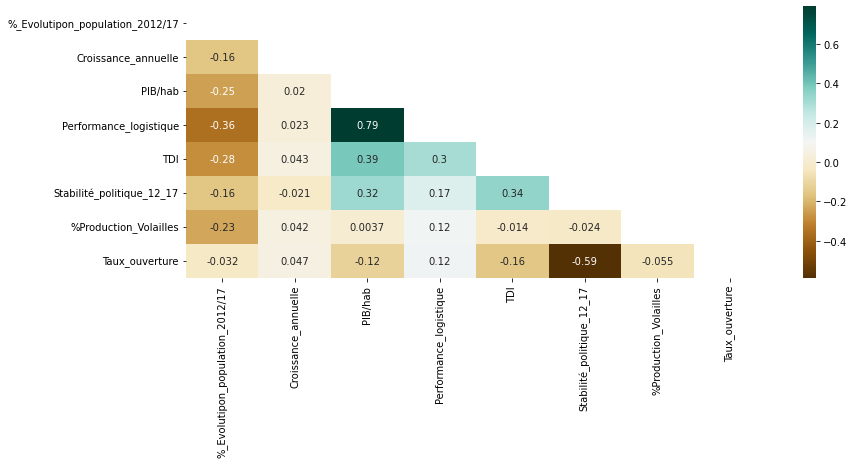

In [25]:
# Calculate pairwise-correlation
matrix = df_final.corr()

# Triangle de corrélations
mask = np.triu(np.ones_like(matrix, dtype='bool'))
plt.figure(figsize=(13, 5))
sns.heatmap(matrix, mask=mask, annot=True, cmap='BrBG')
plt.savefig('df_final_P9_matrice_correlation.png')
plt.show()

# Normalisation des données

In [26]:
df_final

,Pays,%_Evolutipon_population_2012/17,Croissance_annuelle,PIB/hab,Performance_logistique,TDI,Stabilité_politique_12_17,%Production_Volailles,Taux_ouverture
0,Afghanistan,16.48,0.65,513.09,1.99,12.18,-2.57,13.40,2.83
1,Afrique du Sud,7.91,16.11,"6,121.88",3.54,26.13,-0.14,65.53,10.01
2,Albanie,-1.03,9.85,"4,514.20",2.48,56.48,0.25,23.64,0.76
3,Algérie,10.71,4.14,"4,109.70",2.45,7.94,-1.14,41.54,0.71
4,Allemagne,2.08,5.61,"44,552.06",4.13,52.56,0.77,20.60,8.63
...,...,...,...,...,...,...,...,...,...
167,Émirats arabes unis,3.78,6.56,"40,644.80",3.76,96.75,0.74,28.92,1.02
168,Équateur,8.47,2.53,"6,213.50",2.75,10.47,0.33,28.55,5.51
169,États-Unis d'Amérique,3.52,3.59,"60,116.57",3.90,11.17,-3.13,60.60,9.07
170,Éthiopie,14.75,3.63,721.75,2.39,1.58,-1.52,5.60,0.35


In [27]:
# normalize() (transfo de la variable entre 0 et 1, sans la cenrter, sans changer la distribution)

# Variables à normaliser et standardiser

variables_non_std = df_final.drop("Pays", axis=1)


In [28]:

X = variables_non_std.values
from sklearn.preprocessing import normalize
X_scaled = normalize(X)

# Réunion de toutes les variables standardisées
df_std = pd.merge(
    df_final.drop(variables_non_std.columns, axis=1), # Variables n'ayant pas nécessité une standardisation
    pd.DataFrame(X_scaled, columns=variables_non_std.columns), # Variables précédemment standardisées
    left_index=True, right_index=True)

df_std

,Pays,%_Evolutipon_population_2012/17,Croissance_annuelle,PIB/hab,Performance_logistique,TDI,Stabilité_politique_12_17,%Production_Volailles,Taux_ouverture
0,Afghanistan,0.03,0.00,1.00,0.00,0.02,-0.00,0.03,0.01
1,Afrique du Sud,0.00,0.00,1.00,0.00,0.00,-0.00,0.01,0.00
2,Albanie,-0.00,0.00,1.00,0.00,0.01,0.00,0.01,0.00
3,Algérie,0.00,0.00,1.00,0.00,0.00,-0.00,0.01,0.00
4,Allemagne,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...
167,Émirats arabes unis,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
168,Équateur,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
169,États-Unis d'Amérique,0.00,0.00,1.00,0.00,0.00,-0.00,0.00,0.00
170,Éthiopie,0.02,0.01,1.00,0.00,0.00,-0.00,0.01,0.00


# Analyse distribution

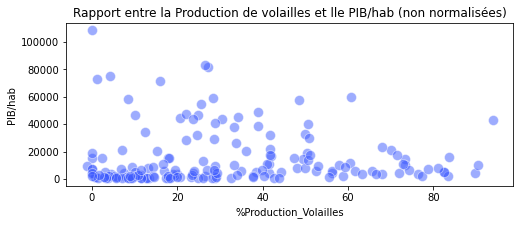

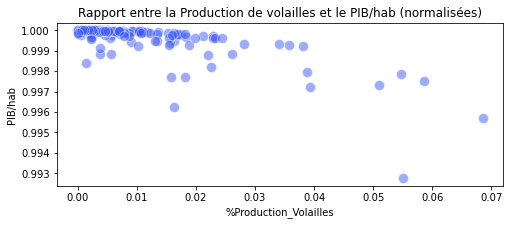

In [29]:
plt.figure(figsize=(8, 3))
sns.scatterplot(data=df_final, x='%Production_Volailles', y='PIB/hab', s=100, alpha=.5, color=indigo_a400)
plt.title('Rapport entre la Production de volailles et lle PIB/hab (non normalisées)')
plt.show()

plt.figure(figsize=(8, 3))
sns.scatterplot(data=df_std,x='%Production_Volailles', y='PIB/hab', s=100, alpha=.5, color=indigo_a400)
plt.title('Rapport entre la Production de volailles et le PIB/hab (normalisées)')
plt.savefig('Visualisation Normalisation.png')
plt.show()

# Dendogramme

In [30]:
data_dendogramme= df_std.set_index('Pays') 
data_dendogramme

,%_Evolutipon_population_2012/17,Croissance_annuelle,PIB/hab,Performance_logistique,TDI,Stabilité_politique_12_17,%Production_Volailles,Taux_ouverture
Pays,,,,,,,,
Afghanistan,0.03,0.00,1.00,0.00,0.02,-0.00,0.03,0.01
Afrique du Sud,0.00,0.00,1.00,0.00,0.00,-0.00,0.01,0.00
Albanie,-0.00,0.00,1.00,0.00,0.01,0.00,0.01,0.00
Algérie,0.00,0.00,1.00,0.00,0.00,-0.00,0.01,0.00
Allemagne,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...
Émirats arabes unis,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
Équateur,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
États-Unis d'Amérique,0.00,0.00,1.00,0.00,0.00,-0.00,0.00,0.00


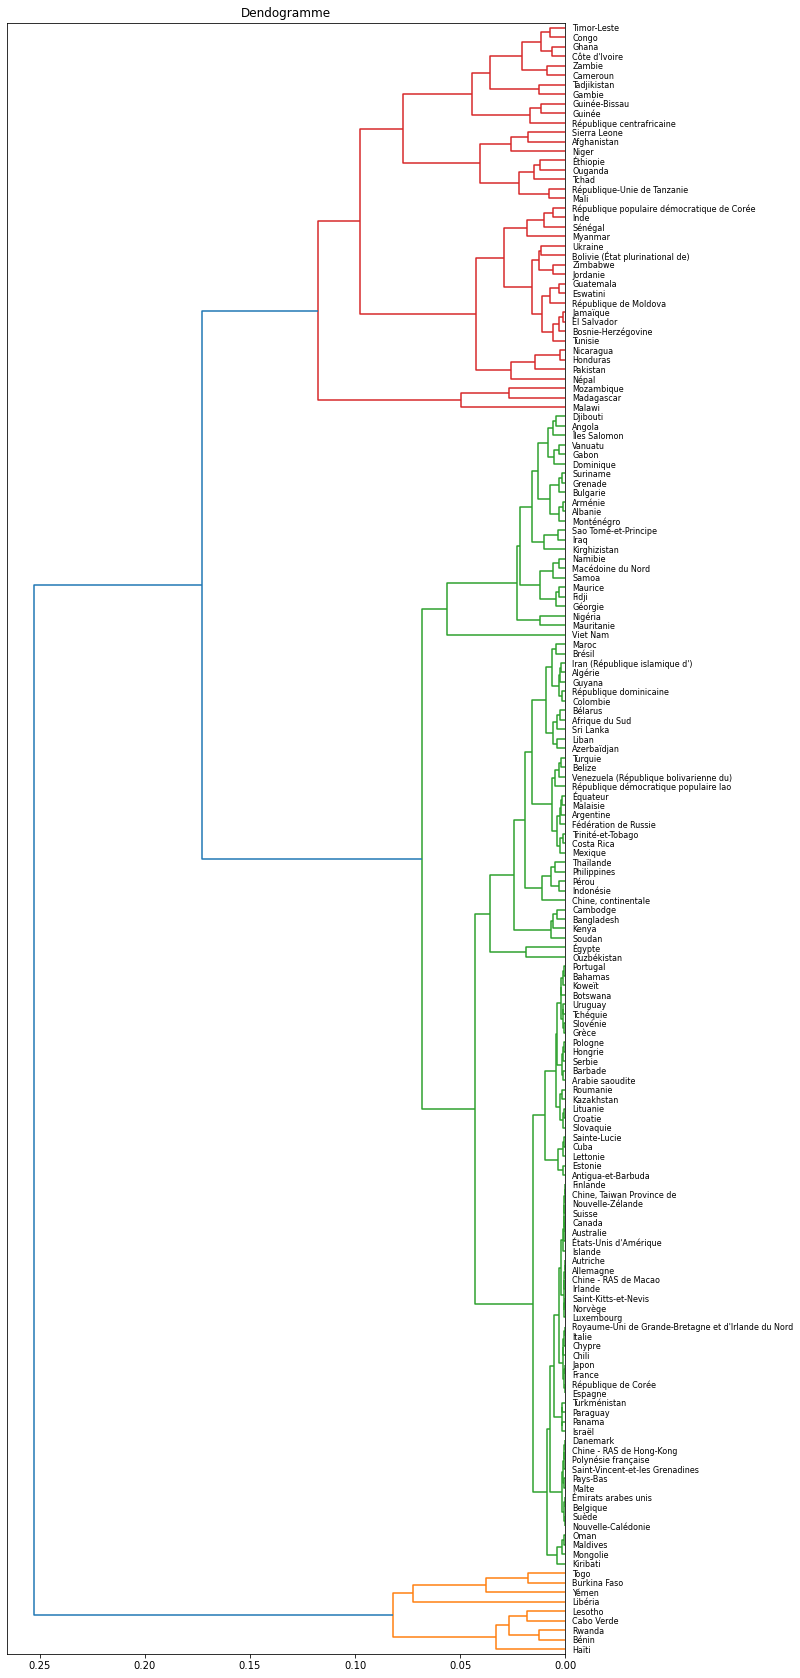

In [31]:
# Libraries
import pandas as pd
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
from upsetplot import generate_data, plot

plt.figure(figsize=(10, 30))  

# Data set
df = data_dendogramme

 
# Calculate the distance between each sample
Z = linkage(df , method='ward')
 
# Plot with Custom leaves
dendrogram(Z, leaf_font_size=8, labels=df.index, orientation='left', color_threshold=0.15)
plt.title('Dendogramme')
plt.savefig('Dendogramme.png')
plt.show()

In [32]:
pd.DataFrame(Z)

,0,1,2,3
0,31.00,42.00,0.00,2.00
1,33.00,50.00,0.00,2.00
2,108.00,146.00,0.00,2.00
3,4.00,11.00,0.00,2.00
4,107.00,133.00,0.00,2.00
...,...,...,...,...
166,325.00,336.00,0.08,9.00
167,330.00,337.00,0.10,38.00
168,333.00,339.00,0.12,41.00
169,335.00,340.00,0.17,163.00


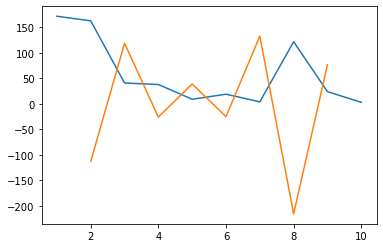

clusters: 3


<Figure size 432x288 with 0 Axes>

In [33]:

last = Z[-10:, 3]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax()- 2  # if idx 0 is the max of this we want 2 clusters
plt.savefig('Dendo_Silhouette.png')
print("clusters:", k)

In [34]:
# Extraction des clusters du dendogramme
from scipy.cluster.hierarchy import fcluster
max_d = 0.15
clusters = fcluster(Z, max_d, criterion='distance')
clusters = pd.DataFrame(clusters)
clusters

,0
0,3
1,2
2,2
3,2
4,2
...,...
167,2
168,2
169,2
170,3


In [35]:
# OU en definissant le nombre de cluster
k=3
cluster2 = fcluster(Z, k, criterion='maxclust')
cluster2 = pd.DataFrame(cluster2)
cluster2

,0
0,3
1,2
2,2
3,2
4,2
...,...
167,2
168,2
169,2
170,3


In [36]:
# Les 2 facon se rejoignent
check = (clusters == cluster2)
check[0].unique()

array([ True])

In [37]:
Dendogramme_cluster = cluster2.merge(df_final.Pays, left_index=True, right_index=True)
Dendogramme_cluster = Dendogramme_cluster.rename(columns={0:'Cluster'})
Dendogramme_cluster

,Cluster,Pays
0,3,Afghanistan
1,2,Afrique du Sud
2,2,Albanie
3,2,Algérie
4,2,Allemagne
...,...,...
167,2,Émirats arabes unis
168,2,Équateur
169,2,États-Unis d'Amérique
170,3,Éthiopie


In [38]:
Dendogramme_cluster_name = Dendogramme_cluster.set_index("Pays")
for i in range(1,4):
    print(f"Group Dendogramme {i}")
    print(", ".join(Dendogramme_cluster_name.loc[Dendogramme_cluster_name["Cluster"]==i].index.sort_values()))
    print(" ")

Group Dendogramme 1
Burkina Faso, Bénin, Cabo Verde, Haïti, Lesotho, Libéria, Rwanda, Togo, Yémen
 
Group Dendogramme 2
Afrique du Sud, Albanie, Algérie, Allemagne, Angola, Antigua-et-Barbuda, Arabie saoudite, Argentine, Arménie, Australie, Autriche, Azerbaïdjan, Bahamas, Bangladesh, Barbade, Belgique, Belize, Botswana, Brésil, Bulgarie, Bélarus, Cambodge, Canada, Chili, Chine - RAS de Hong-Kong, Chine - RAS de Macao, Chine, Taiwan Province de, Chine, continentale, Chypre, Colombie, Costa Rica, Croatie, Cuba, Danemark, Djibouti, Dominique, Espagne, Estonie, Fidji, Finlande, France, Fédération de Russie, Gabon, Grenade, Grèce, Guyana, Géorgie, Hongrie, Indonésie, Iran (République islamique d'), Iraq, Irlande, Islande, Israël, Italie, Japon, Kazakhstan, Kenya, Kirghizistan, Kiribati, Koweït, Lettonie, Liban, Lituanie, Luxembourg, Macédoine du Nord, Malaisie, Maldives, Malte, Maroc, Maurice, Mauritanie, Mexique, Mongolie, Monténégro, Namibie, Nigéria, Norvège, Nouvelle-Calédonie, Nouvelle

In [39]:
# Nombre de pays par cluster
Dendogramme_cluster.groupby(["Cluster"]).agg({"Pays":"count"})

,Pays
Cluster,
1,9
2,122
3,41


In [40]:
#distances aux centres de classes des observations
results_dendogramme = pd.DataFrame(Z)
results_dendogramme

,0,1,2,3
0,31.00,42.00,0.00,2.00
1,33.00,50.00,0.00,2.00
2,108.00,146.00,0.00,2.00
3,4.00,11.00,0.00,2.00
4,107.00,133.00,0.00,2.00
...,...,...,...,...
166,325.00,336.00,0.08,9.00
167,330.00,337.00,0.10,38.00
168,333.00,339.00,0.12,41.00
169,335.00,340.00,0.17,163.00


In [41]:
dendogramme = pd.merge(results_dendogramme, Dendogramme_cluster, left_index=True, right_index=True)
#dendogramme = dendogramme.set_index("Pays")
dendogramme

,0,1,2,3,Cluster,Pays
0,31.00,42.00,0.00,2.00,3,Afghanistan
1,33.00,50.00,0.00,2.00,2,Afrique du Sud
2,108.00,146.00,0.00,2.00,2,Albanie
3,4.00,11.00,0.00,2.00,2,Algérie
4,107.00,133.00,0.00,2.00,2,Allemagne
...,...,...,...,...,...,...
166,325.00,336.00,0.08,9.00,2,Égypte
167,330.00,337.00,0.10,38.00,2,Émirats arabes unis
168,333.00,339.00,0.12,41.00,2,Équateur
169,335.00,340.00,0.17,163.00,2,États-Unis d'Amérique


In [42]:
# Moyenne par cluster de chaque composante issue de l'ACP (centroïdes)
centroides = dendogramme.groupby(['Cluster']).mean().reset_index()
centroides['Cluster'] = 'centroïde'
centroides['Pays'] = 'centroïde'
centroides

,Cluster,0,1,2,3,Pays
0,centroïde,133.11,190.44,0.01,16.78,centroïde
1,centroïde,134.23,200.39,0.01,8.20,centroïde
2,centroïde,150.95,212.71,0.02,13.02,centroïde


In [43]:
# Jointure des centroïdes sur la dataframe des 2 composantes
Cluster_groupe_Kmeans_results_centroides = pd.concat([dendogramme, centroides])
Cluster_groupe_Kmeans_results_centroides

,0,1,2,3,Cluster,Pays
0,31.00,42.00,0.00,2.00,3,Afghanistan
1,33.00,50.00,0.00,2.00,2,Afrique du Sud
2,108.00,146.00,0.00,2.00,2,Albanie
3,4.00,11.00,0.00,2.00,2,Algérie
4,107.00,133.00,0.00,2.00,2,Allemagne
...,...,...,...,...,...,...
169,335.00,340.00,0.17,163.00,2,États-Unis d'Amérique
170,338.00,341.00,0.25,172.00,3,Éthiopie
0,133.11,190.44,0.01,16.78,centroïde,centroïde
1,134.23,200.39,0.01,8.20,centroïde,centroïde


In [44]:
df_final_dendogramme = df_final.merge(dendogramme, left_on="Pays", right_on="Pays", how="right")

In [45]:
# Enregistrement CSV

df_final_dendogramme.to_csv(r'C:\Users\melle\FORMATION\P9_MENDY_Angèle\P9_Nobook_Done\df_sortie_Analyse\df_final_dendogramme.csv')  

In [46]:
Cluster_poids_variable = df_final_dendogramme.groupby("Cluster").median()
Cluster_poids_variable = Cluster_poids_variable.T
Cluster_poids_variable = Cluster_poids_variable.reset_index()
Cluster_poids_variable

Cluster,index,1,2,3
0,%_Evolutipon_population_2012/17,13.65,4.33,12.02
1,Croissance_annuelle,4.53,6.50,5.71
2,PIB/hab,775.89,"10,259.21","1,361.70"
3,Performance_logistique,2.44,2.97,2.47
4,TDI,61.34,37.35,15.65
5,Stabilité_politique_12_17,-0.29,0.27,-0.64
6,%Production_Volailles,20.69,28.34,19.92
7,Taux_ouverture,6.21,1.33,2.32
8,0,92.00,109.00,130.00
9,1,209.00,199.00,222.00


In [47]:
normalized_Cluster_poids_variable = pd.DataFrame(normalize(Cluster_poids_variable.set_index("index")))
normalized_Cluster_poids_variable = normalized_Cluster_poids_variable.rename(columns={0:"Cluster_1"})
normalized_Cluster_poids_variable = normalized_Cluster_poids_variable.rename(columns={1:"Cluster_2"})
normalized_Cluster_poids_variable = normalized_Cluster_poids_variable.rename(columns={2:"Cluster_3"})
normalized_Cluster_poids_variable = Cluster_poids_variable.merge(normalized_Cluster_poids_variable,left_index=True, right_index=True)
normalized_Cluster_poids_variable

,index,1,2,3,Cluster_1,Cluster_2,Cluster_3
0,%_Evolutipon_population_2012/17,13.65,4.33,12.02,0.73,0.23,0.64
1,Croissance_annuelle,4.53,6.50,5.71,0.46,0.67,0.58
2,PIB/hab,775.89,"10,259.21","1,361.70",0.07,0.99,0.13
3,Performance_logistique,2.44,2.97,2.47,0.53,0.65,0.54
4,TDI,61.34,37.35,15.65,0.83,0.51,0.21
5,Stabilité_politique_12_17,-0.29,0.27,-0.64,-0.39,0.36,-0.85
6,%Production_Volailles,20.69,28.34,19.92,0.51,0.70,0.49
7,Taux_ouverture,6.21,1.33,2.32,0.92,0.20,0.34
8,0,92.00,109.00,130.00,0.48,0.56,0.67
9,1,209.00,199.00,222.00,0.57,0.55,0.61


In [48]:
normalized_Cluster_poids_variable = normalized_Cluster_poids_variable[["index",'Cluster_1', 'Cluster_2', 'Cluster_3']]
normalized_Cluster_poids_variable = normalized_Cluster_poids_variable.rename(columns={"index":"Variables"})
normalized_Cluster_poids_variable = normalized_Cluster_poids_variable.set_index("Variables")
normalized_Cluster_poids_variable = normalized_Cluster_poids_variable[:8]
normalized_Cluster_poids_variable

,Cluster_1,Cluster_2,Cluster_3
Variables,,,
%_Evolutipon_population_2012/17,0.73,0.23,0.64
Croissance_annuelle,0.46,0.67,0.58
PIB/hab,0.07,0.99,0.13
Performance_logistique,0.53,0.65,0.54
TDI,0.83,0.51,0.21
Stabilité_politique_12_17,-0.39,0.36,-0.85
%Production_Volailles,0.51,0.70,0.49
Taux_ouverture,0.92,0.20,0.34


## HeatMap

<Figure size 720x2160 with 0 Axes>

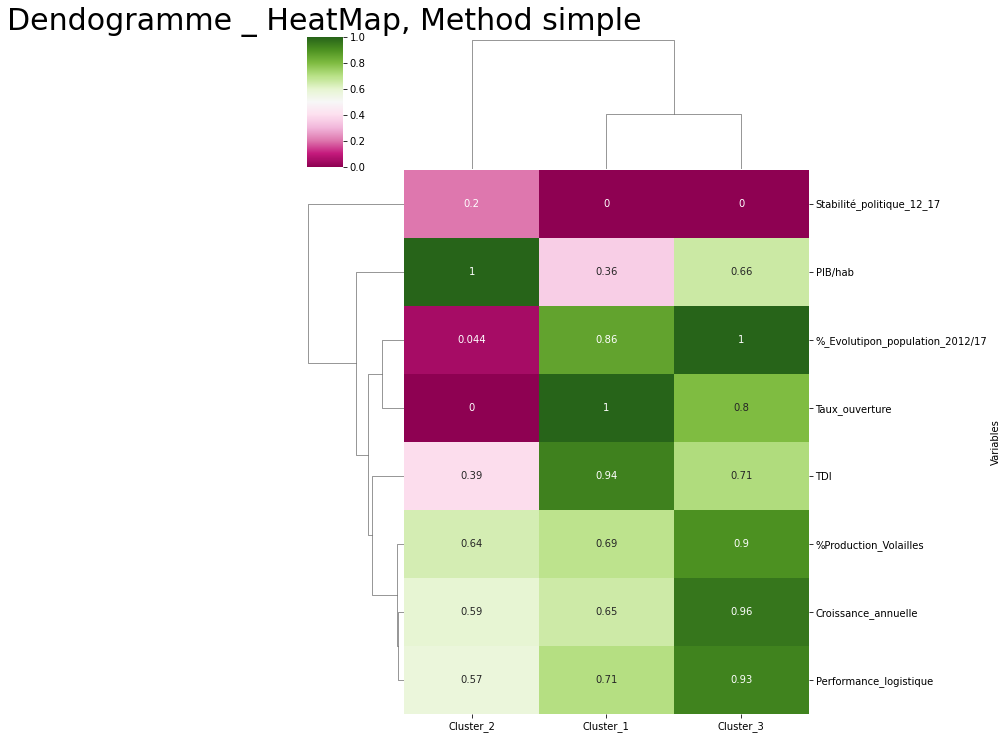

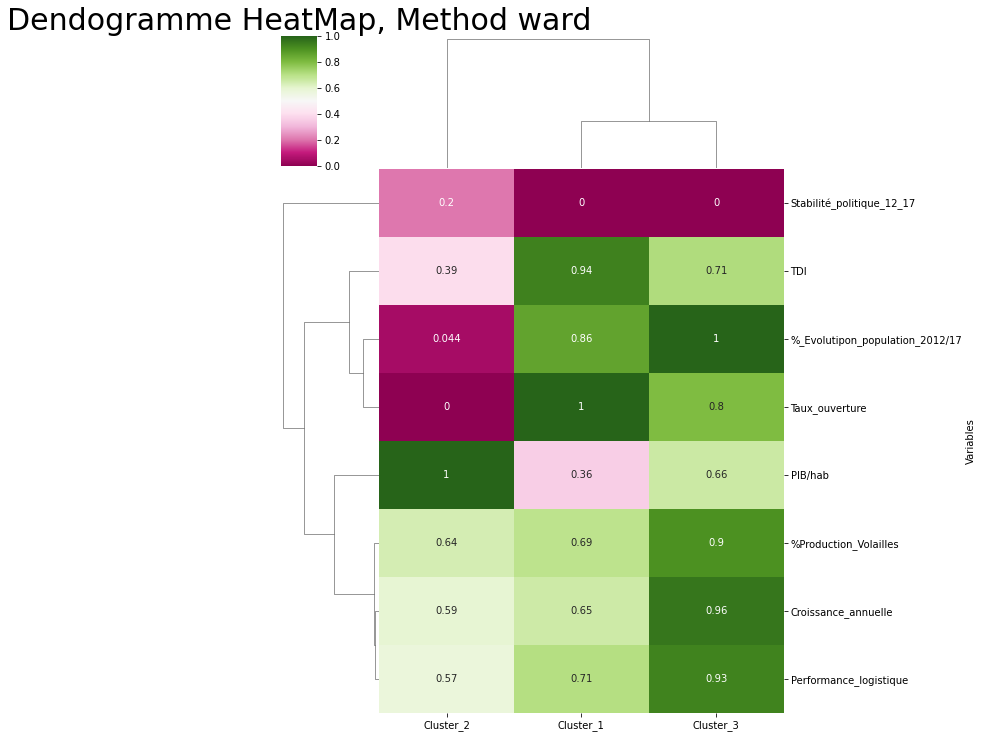

In [49]:
# http://www.python-simple.com/python-seaborn/seaborn-heatmap.php

# Libraries
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
 
# Data set

df = normalized_Cluster_poids_variable

plt.figure(figsize=(10, 30))  

# linkage method to use for calculating clusters: single
sns.clustermap(df, annot = True, cbar = True, cmap="PiYG", metric="euclidean", standard_scale=1, method="single")
plt.title("Dendogramme _ HeatMap, Method simple", fontsize=30)
plt.show()

# linkage method to use for calculating clusters: ward
sns.clustermap(df, annot = True, cbar = True, cmap="PiYG", metric="euclidean", standard_scale=1, method="ward")
plt.title("Dendogramme HeatMap, Method ward", fontsize=30)
plt.savefig('Dendo_Heatmap.png')
plt.show()

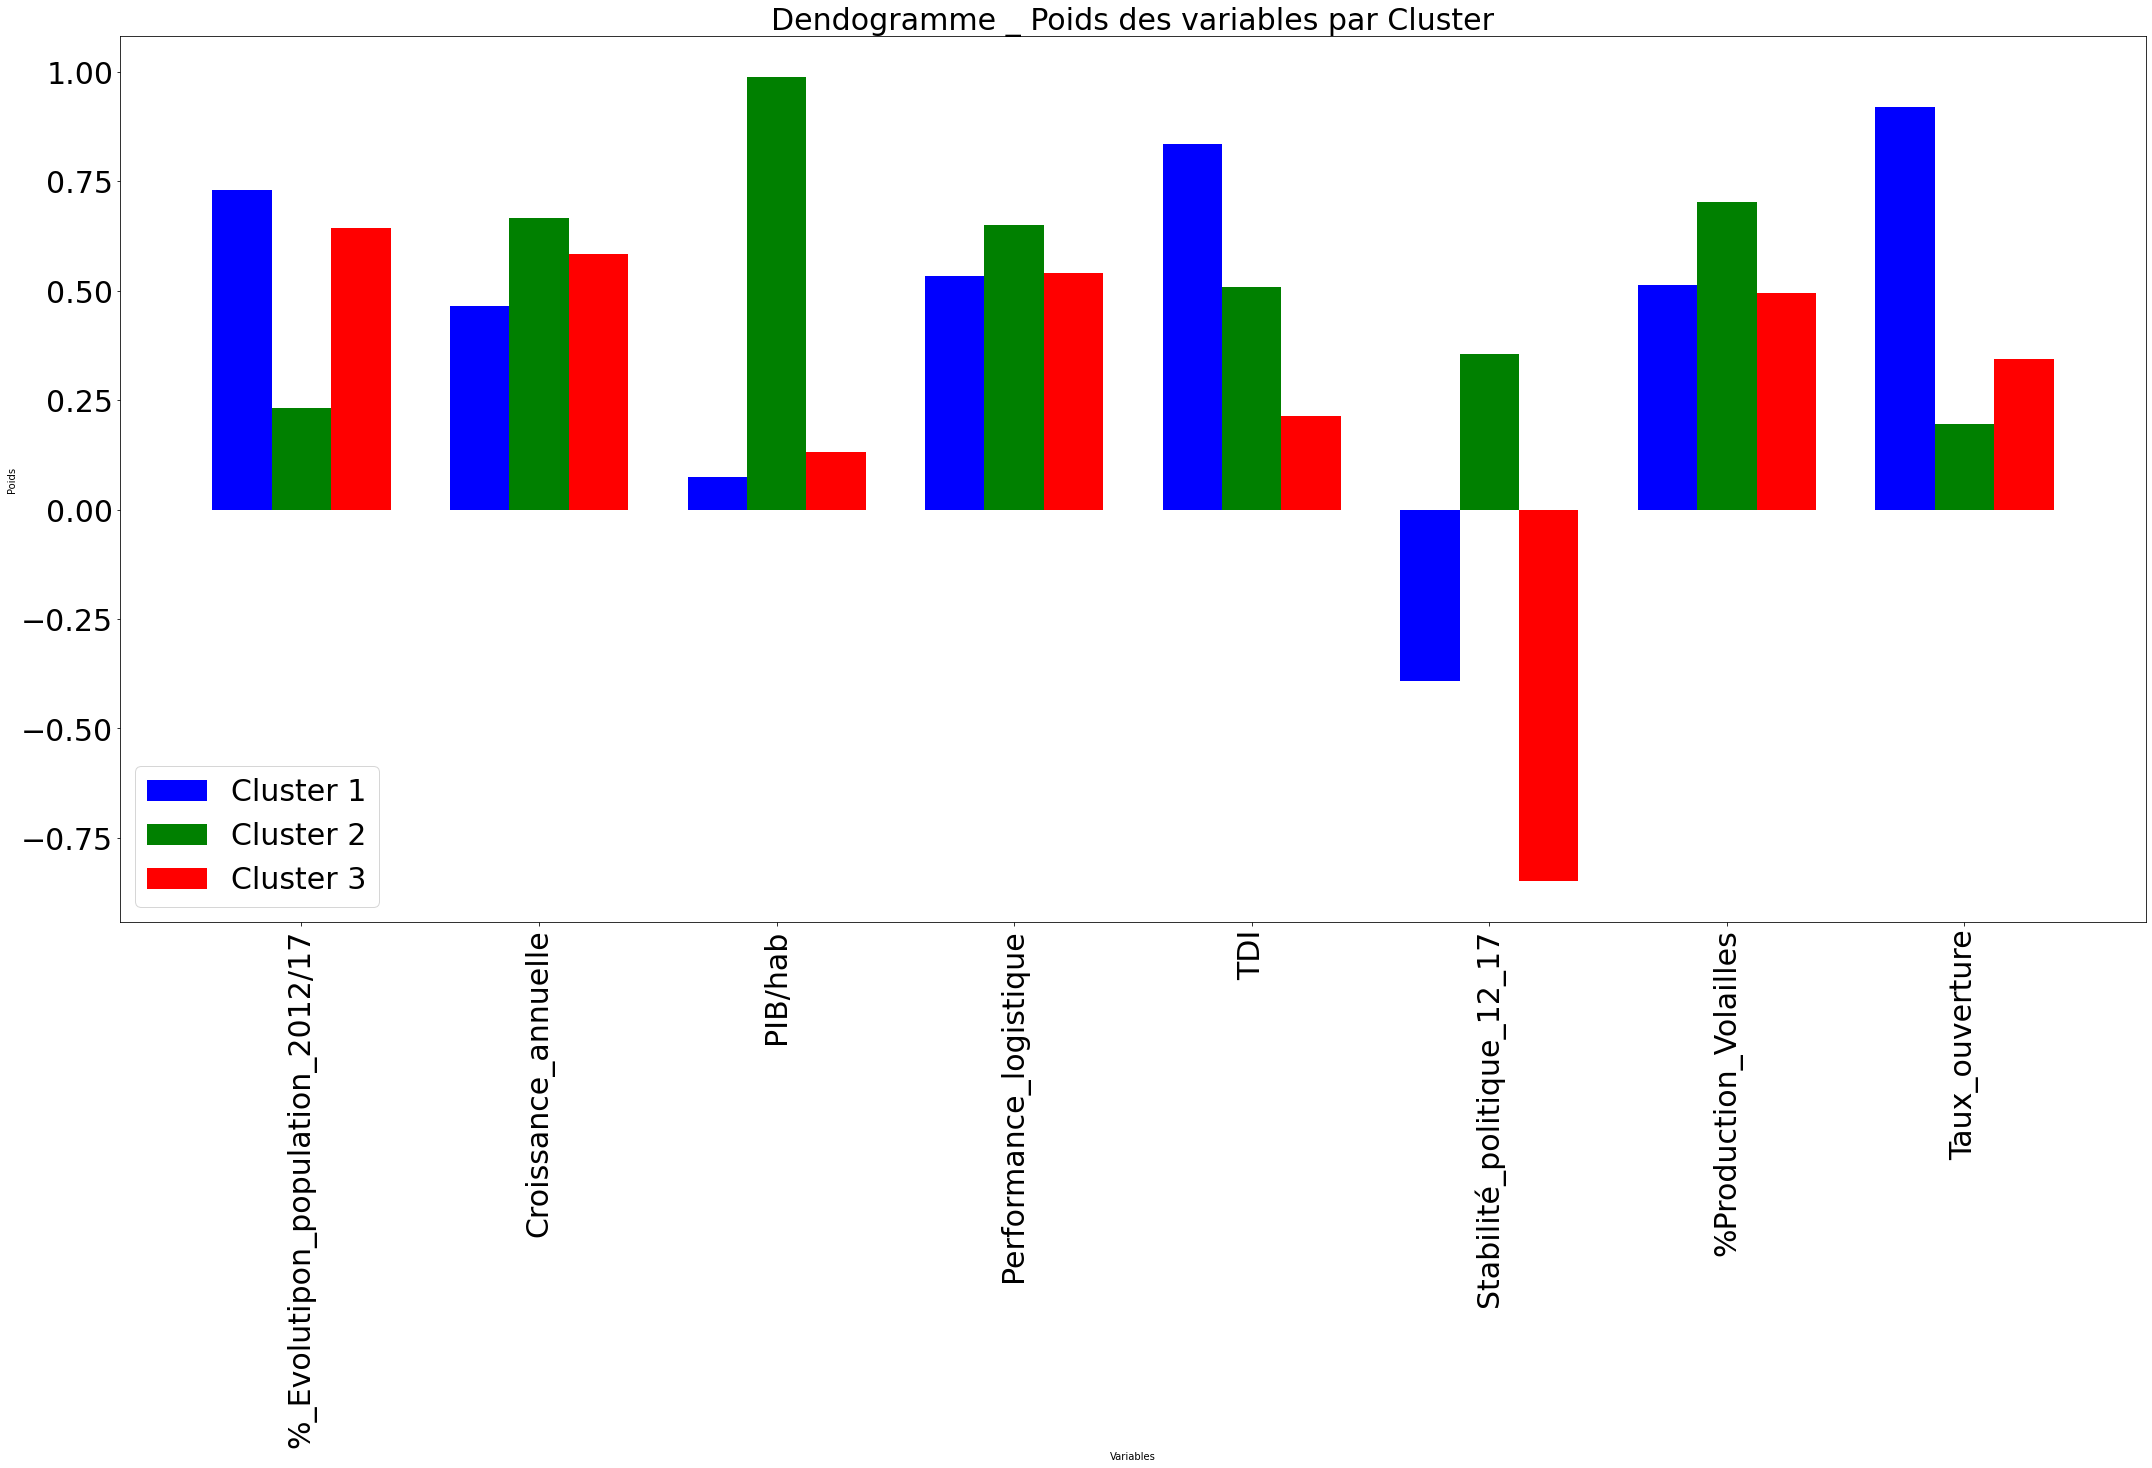

In [50]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure



# data to plot
n_groups = 8
Cluster_1 = normalized_Cluster_poids_variable["Cluster_1"].values
Cluster_2 = normalized_Cluster_poids_variable["Cluster_2"].values
Cluster_3 = normalized_Cluster_poids_variable["Cluster_3"].values




# create plot
fig, ax = plt.subplots()
fig.set_size_inches(30, 20.5)
index = np.arange(n_groups)
bar_width = 0.25
opacity = 1

 
rects1 = plt.bar(index, Cluster_1, bar_width,
alpha=opacity,
color='b',
label='Cluster 1')

rects2 = plt.bar(index + bar_width, Cluster_2, bar_width,
alpha=opacity,
color='g',
label='Cluster 2')

rects3 = plt.bar(index + bar_width + bar_width , Cluster_3, bar_width,
alpha=opacity,
color='r',
label='Cluster 3')



plt.xlabel('Variables')
plt.ylabel('Poids')
plt.yticks(fontsize=30)
plt.title('Dendogramme _ Poids des variables par Cluster',fontsize=30)
plt.xticks(index + bar_width, (normalized_Cluster_poids_variable.index))
plt.xticks(rotation=90,fontsize=30)
plt.legend(fontsize=30)

plt.tight_layout()
plt.savefig('Dendo_Poids_Cluster.png')
plt.show()

## Conclusion:

In [51]:
Proposition_client_dendogramme = df_final_dendogramme.query("Cluster == 2")
Proposition_client_dendogramme

,Pays,%_Evolutipon_population_2012/17,Croissance_annuelle,PIB/hab,Performance_logistique,TDI,Stabilité_politique_12_17,%Production_Volailles,Taux_ouverture,0,1,2,3,Cluster
1,Afrique du Sud,7.91,16.11,"6,121.88",3.54,26.13,-0.14,65.53,10.01,33.00,50.00,0.00,2.00,2
2,Albanie,-1.03,9.85,"4,514.20",2.48,56.48,0.25,23.64,0.76,108.00,146.00,0.00,2.00,2
3,Algérie,10.71,4.14,"4,109.70",2.45,7.94,-1.14,41.54,0.71,4.00,11.00,0.00,2.00,2
4,Allemagne,2.08,5.61,"44,552.06",4.13,52.56,0.77,20.60,8.63,107.00,133.00,0.00,2.00,2
5,Angola,18.75,16.82,"4,095.81",2.31,50.66,-0.39,7.51,6.99,73.00,124.00,0.00,2.00,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Viet Nam,5.34,7.91,"2,365.52",3.04,17.45,0.08,8.87,97.59,162.00,318.00,0.06,24.00,2
166,Égypte,11.59,-29.29,"2,023.33",2.82,15.62,-1.64,40.26,13.05,325.00,336.00,0.08,9.00,2
167,Émirats arabes unis,3.78,6.56,"40,644.80",3.76,96.75,0.74,28.92,1.02,330.00,337.00,0.10,38.00,2
168,Équateur,8.47,2.53,"6,213.50",2.75,10.47,0.33,28.55,5.51,333.00,339.00,0.12,41.00,2


In [52]:
# Liste des Pays du Cluster 2
Proposition_client_dendogramme.Pays.to_list()

['Afrique du Sud',
 'Albanie',
 'Algérie',
 'Allemagne',
 'Angola',
 'Antigua-et-Barbuda',
 'Arabie saoudite',
 'Argentine',
 'Arménie',
 'Australie',
 'Autriche',
 'Azerbaïdjan',
 'Bahamas',
 'Bangladesh',
 'Barbade',
 'Belgique',
 'Belize',
 'Botswana',
 'Brésil',
 'Bulgarie',
 'Bélarus',
 'Cambodge',
 'Canada',
 'Chili',
 'Chine - RAS de Hong-Kong',
 'Chine - RAS de Macao',
 'Chine, Taiwan Province de',
 'Chine, continentale',
 'Chypre',
 'Colombie',
 'Costa Rica',
 'Croatie',
 'Cuba',
 'Danemark',
 'Djibouti',
 'Dominique',
 'Espagne',
 'Estonie',
 'Fidji',
 'Finlande',
 'France',
 'Fédération de Russie',
 'Gabon',
 'Grenade',
 'Grèce',
 'Guyana',
 'Géorgie',
 'Hongrie',
 'Indonésie',
 "Iran (République islamique d')",
 'Iraq',
 'Irlande',
 'Islande',
 'Israël',
 'Italie',
 'Japon',
 'Kazakhstan',
 'Kenya',
 'Kirghizistan',
 'Kiribati',
 'Koweït',
 'Lettonie',
 'Liban',
 'Lituanie',
 'Luxembourg',
 'Macédoine du Nord',
 'Malaisie',
 'Maldives',
 'Malte',
 'Maroc',
 'Maurice',
 'Mau

In [53]:
# Données médiane du Cluster 2
Proposition_client_dendo_median = pd.DataFrame(Proposition_client_dendogramme.set_index("Pays").median())
Proposition_client_dendo_median = Proposition_client_dendo_median.rename(columns={0:"Dendogramme_Cluster2"})
Proposition_client_dendo_median

,Dendogramme_Cluster2
%_Evolutipon_population_2012/17,4.33
Croissance_annuelle,6.50
PIB/hab,"10,259.21"
Performance_logistique,2.97
TDI,37.35
Stabilité_politique_12_17,0.27
%Production_Volailles,28.34
Taux_ouverture,1.33
0,109.00
1,199.00


# Kmeans

In [54]:
df_final

,Pays,%_Evolutipon_population_2012/17,Croissance_annuelle,PIB/hab,Performance_logistique,TDI,Stabilité_politique_12_17,%Production_Volailles,Taux_ouverture
0,Afghanistan,16.48,0.65,513.09,1.99,12.18,-2.57,13.40,2.83
1,Afrique du Sud,7.91,16.11,"6,121.88",3.54,26.13,-0.14,65.53,10.01
2,Albanie,-1.03,9.85,"4,514.20",2.48,56.48,0.25,23.64,0.76
3,Algérie,10.71,4.14,"4,109.70",2.45,7.94,-1.14,41.54,0.71
4,Allemagne,2.08,5.61,"44,552.06",4.13,52.56,0.77,20.60,8.63
...,...,...,...,...,...,...,...,...,...
167,Émirats arabes unis,3.78,6.56,"40,644.80",3.76,96.75,0.74,28.92,1.02
168,Équateur,8.47,2.53,"6,213.50",2.75,10.47,0.33,28.55,5.51
169,États-Unis d'Amérique,3.52,3.59,"60,116.57",3.90,11.17,-3.13,60.60,9.07
170,Éthiopie,14.75,3.63,721.75,2.39,1.58,-1.52,5.60,0.35


In [55]:
data_kmeans = df_final.set_index("Pays")
data_kmeans

,%_Evolutipon_population_2012/17,Croissance_annuelle,PIB/hab,Performance_logistique,TDI,Stabilité_politique_12_17,%Production_Volailles,Taux_ouverture
Pays,,,,,,,,
Afghanistan,16.48,0.65,513.09,1.99,12.18,-2.57,13.40,2.83
Afrique du Sud,7.91,16.11,"6,121.88",3.54,26.13,-0.14,65.53,10.01
Albanie,-1.03,9.85,"4,514.20",2.48,56.48,0.25,23.64,0.76
Algérie,10.71,4.14,"4,109.70",2.45,7.94,-1.14,41.54,0.71
Allemagne,2.08,5.61,"44,552.06",4.13,52.56,0.77,20.60,8.63
...,...,...,...,...,...,...,...,...
Émirats arabes unis,3.78,6.56,"40,644.80",3.76,96.75,0.74,28.92,1.02
Équateur,8.47,2.53,"6,213.50",2.75,10.47,0.33,28.55,5.51
États-Unis d'Amérique,3.52,3.59,"60,116.57",3.90,11.17,-3.13,60.60,9.07


In [56]:
#k-means sur les données centrées et réduites
from sklearn import cluster
kmeans = cluster.KMeans(n_clusters=3)
kmeans.fit(data_kmeans)

KMeans(n_clusters=3)

[0.         1.         0.69455773 3.         4.         5.
 6.         7.         8.        ]


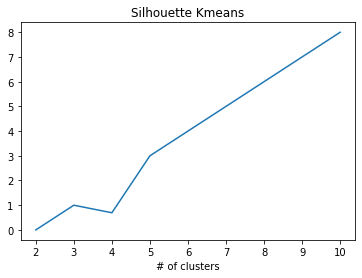

La partition en k = 3 groupes semble la meilleure au sens de la métrique « silhouette ».


<Figure size 432x288 with 0 Axes>

In [57]:
#librairie pour évaluation des partitions
from sklearn import metrics
#utilisation de la métrique "silhouette"
#faire varier le nombre de clusters de 2 à 10
res = np.arange(9,dtype="double")
for k in np.arange(3):
    km = cluster.KMeans(n_clusters=k+2)
km.fit(data_kmeans)
res[k] = metrics.silhouette_score(data_kmeans,km.labels_)
print(res)
#graphique
import matplotlib.pyplot as plt
plt.title("Silhouette Kmeans")
plt.xlabel("# of clusters")
plt.plot(np.arange(2,11,1),res)
plt.show()
plt.savefig('Silhouette Kmeans.png')
print("La partition en k = 3 groupes semble la meilleure au sens de la métrique « silhouette ».") 

In [58]:
#index triés des groupes
idk = np.argsort(kmeans.labels_)
#affichage des observations et leurs groupes
Cluster_groupe_Kmeans = pd.DataFrame(data_kmeans.index[idk],kmeans.labels_[idk])
Cluster_groupe_Kmeans = Cluster_groupe_Kmeans.reset_index()
Cluster_groupe_Kmeans = Cluster_groupe_Kmeans.rename(columns={"index":"Cluster"})
Cluster_groupe_Kmeans = Cluster_groupe_Kmeans.set_index("Pays")
Cluster_groupe_Kmeans

,Cluster
Pays,
Afghanistan,0
Nicaragua,0
Niger,0
Nigéria,0
Népal,0
...,...
Islande,2
Irlande,2
Chine - RAS de Macao,2


In [59]:
Cluster_groupe_Kmeans.reset_index(inplace=True)
Poid_cluster_kmeans = Cluster_groupe_Kmeans.groupby("Cluster").agg({"Pays":"count"})
Poid_cluster_kmeans

,Pays
Cluster,
0,140
1,26
2,6


In [60]:
#distances aux centres de classes des observations OKOKOK
results_kmean = pd.DataFrame(kmeans.transform(data_kmeans))
results_kmean

,0,1,2
0,"5,609.70","41,820.64","81,671.13"
1,37.33,"36,211.85","76,062.35"
2,"1,608.67","37,819.48","77,669.99"
3,"2,013.22","38,224.03","78,074.52"
4,"38,429.37","2,218.48","37,632.14"
...,...,...,...
167,"34,522.17","1,689.14","41,539.40"
168,94.44,"36,120.23","75,970.72"
169,"53,993.89","17,783.00","22,067.76"
170,"5,401.12","41,611.99","81,462.47"


In [61]:
for i in range(0,3):
    print(f"Group Kmeans {i}")
    print(", ".join(Cluster_groupe_Kmeans.loc[Cluster_groupe_Kmeans["Cluster"]==i].Pays.sort_values()))
    print(" ")

Group Kmeans 0
Afghanistan, Afrique du Sud, Albanie, Algérie, Angola, Antigua-et-Barbuda, Arabie saoudite, Argentine, Arménie, Azerbaïdjan, Bangladesh, Barbade, Belize, Bolivie (État plurinational de), Bosnie-Herzégovine, Botswana, Brésil, Bulgarie, Burkina Faso, Bélarus, Bénin, Cabo Verde, Cambodge, Cameroun, Chili, Chine, continentale, Colombie, Congo, Costa Rica, Croatie, Cuba, Côte d'Ivoire, Djibouti, Dominique, El Salvador, Estonie, Eswatini, Fidji, Fédération de Russie, Gabon, Gambie, Ghana, Grenade, Grèce, Guatemala, Guinée, Guinée-Bissau, Guyana, Géorgie, Haïti, Honduras, Hongrie, Inde, Indonésie, Iran (République islamique d'), Iraq, Jamaïque, Jordanie, Kazakhstan, Kenya, Kirghizistan, Kiribati, Lesotho, Lettonie, Liban, Libéria, Lituanie, Macédoine du Nord, Madagascar, Malaisie, Malawi, Maldives, Mali, Maroc, Maurice, Mauritanie, Mexique, Mongolie, Monténégro, Mozambique, Myanmar, Namibie, Nicaragua, Niger, Nigéria, Népal, Oman, Ouganda, Ouzbékistan, Pakistan, Panama, Paragua

In [62]:
Cluster_groupe_Kmeans = Cluster_groupe_Kmeans.reset_index()

In [63]:
Cluster_groupe_Kmeans_results = Cluster_groupe_Kmeans.merge(results_kmean, left_index=True, right_index=True)
Kmeans = Cluster_groupe_Kmeans_results[['Pays', 'Cluster',0,1,2]]
Kmeans

,Pays,Cluster,0,1,2
0,Afghanistan,0,"5,609.70","41,820.64","81,671.13"
1,Nicaragua,0,37.33,"36,211.85","76,062.35"
2,Niger,0,"1,608.67","37,819.48","77,669.99"
3,Nigéria,0,"2,013.22","38,224.03","78,074.52"
4,Népal,0,"38,429.37","2,218.48","37,632.14"
...,...,...,...,...,...
167,Islande,2,"34,522.17","1,689.14","41,539.40"
168,Irlande,2,94.44,"36,120.23","75,970.72"
169,Chine - RAS de Macao,2,"53,993.89","17,783.00","22,067.76"
170,Luxembourg,2,"5,401.12","41,611.99","81,462.47"


In [64]:
# Moyenne par cluster de chaque composante(centroïdes)
centroides = Kmeans.groupby(['Cluster']).mean(numeric_only=True)
centroides['Cluster'] = 'centroïde'
centroides['Pays'] = 'centroïde'
centroides

,0,1,2,Cluster,Pays
Cluster,,,,,
0,"12,003.88","31,669.35","67,979.37",centroïde,centroïde
1,"9,866.11","34,963.82","70,803.71",centroïde,centroïde
2,"17,053.77","29,656.17","63,579.00",centroïde,centroïde


In [65]:
# Jointure des centroïdes sur la dataframe des 2 composantes
Cluster_groupe_Kmeans_results_centroides = pd.concat([Kmeans, centroides])
Cluster_groupe_Kmeans_results_centroides


,Pays,Cluster,0,1,2
0,Afghanistan,0,"5,609.70","41,820.64","81,671.13"
1,Nicaragua,0,37.33,"36,211.85","76,062.35"
2,Niger,0,"1,608.67","37,819.48","77,669.99"
3,Nigéria,0,"2,013.22","38,224.03","78,074.52"
4,Népal,0,"38,429.37","2,218.48","37,632.14"
...,...,...,...,...,...
170,Luxembourg,2,"5,401.12","41,611.99","81,462.47"
171,Suisse,2,"4,211.40","40,422.29","80,272.78"
0,centroïde,centroïde,"12,003.88","31,669.35","67,979.37"
1,centroïde,centroïde,"9,866.11","34,963.82","70,803.71"


In [66]:
df_final_Kmeans = df_final.merge(Kmeans, left_on="Pays", right_on="Pays", how="right")
df_final_Kmeans

,Pays,%_Evolutipon_population_2012/17,Croissance_annuelle,PIB/hab,Performance_logistique,TDI,Stabilité_politique_12_17,%Production_Volailles,Taux_ouverture,Cluster,0,1,2
0,Afghanistan,16.48,0.65,513.09,1.99,12.18,-2.57,13.40,2.83,0,"5,609.70","41,820.64","81,671.13"
1,Nicaragua,6.72,2.45,"2,159.16",2.48,22.32,-0.14,77.30,1.30,0,37.33,"36,211.85","76,062.35"
2,Niger,21.39,4.49,517.08,2.37,5.68,-1.18,11.38,1.06,0,"1,608.67","37,819.48","77,669.99"
3,Nigéria,14.14,-9.53,"1,968.69",2.57,18.17,-1.82,10.06,11.28,0,"2,013.22","38,224.03","78,074.52"
4,Népal,2.38,20.33,926.09,2.31,5.51,-0.95,26.01,0.70,0,"38,429.37","2,218.48","37,632.14"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Islande,2.68,17.99,"73,231.73",3.31,21.74,1.30,1.25,0.53,2,"34,522.17","1,689.14","41,539.40"
168,Irlande,3.15,11.91,"71,391.01",3.75,114.24,0.94,15.97,0.75,2,94.44,"36,120.23","75,970.72"
169,Chine - RAS de Macao,10.38,10.07,"81,516.66",3.86,87.36,2.29,27.27,0.05,2,"53,993.89","17,783.00","22,067.76"
170,Luxembourg,11.50,3.49,"108,431.93",3.86,88.10,1.37,0.00,0.02,2,"5,401.12","41,611.99","81,462.47"


In [67]:
# Enregistrement CSV

df_final_Kmeans.to_csv(r'C:\Users\melle\FORMATION\P9_MENDY_Angèle\P9_Nobook_Done\df_sortie_Analyse\df_final_Kmeans.csv')  

In [68]:
Cluster_poids_variable_Kmeans = df_final_Kmeans.groupby("Cluster").median()
Cluster_poids_variable_Kmeans = Cluster_poids_variable_Kmeans.T
Cluster_poids_variable_Kmeans = Cluster_poids_variable_Kmeans.reset_index()
Cluster_poids_variable_Kmeans

Cluster,index,0,1,2
0,%_Evolutipon_population_2012/17,6.97,3.60,5.61
1,Croissance_annuelle,6.18,5.64,8.58
2,PIB/hab,"4,123.86","43,268.57","78,368.74"
3,Performance_logistique,2.60,3.81,3.83
4,TDI,26.09,50.98,86.44
5,Stabilité_politique_12_17,-0.14,0.84,1.33
6,%Production_Volailles,24.29,29.75,10.08
7,Taux_ouverture,1.63,2.22,0.32
8,0,"4,792.75","4,674.49","4,806.26"
9,1,"36,387.70","39,051.94","38,215.31"


In [69]:
normalized_Cluster_poids_variable_Kmeans = pd.DataFrame(normalize(Cluster_poids_variable_Kmeans.set_index("index")))
normalized_Cluster_poids_variable_Kmeans = normalized_Cluster_poids_variable_Kmeans.rename(columns={0:"Cluster_1"})
normalized_Cluster_poids_variable_Kmeans = normalized_Cluster_poids_variable_Kmeans.rename(columns={1:"Cluster_2"})
normalized_Cluster_poids_variable_Kmeans = normalized_Cluster_poids_variable_Kmeans.rename(columns={2:"Cluster_3"})
normalized_Cluster_poids_variable_Kmeans = normalized_Cluster_poids_variable_Kmeans.merge(Cluster_poids_variable_Kmeans,left_index=True, right_index=True)
normalized_Cluster_poids_variable_Kmeans

,Cluster_1,Cluster_2,Cluster_3,index,0,1,2
0,0.72,0.37,0.58,%_Evolutipon_population_2012/17,6.97,3.60,5.61
1,0.52,0.47,0.72,Croissance_annuelle,6.18,5.64,8.58
2,0.05,0.48,0.87,PIB/hab,"4,123.86","43,268.57","78,368.74"
3,0.43,0.64,0.64,Performance_logistique,2.60,3.81,3.83
4,0.25,0.49,0.83,TDI,26.09,50.98,86.44
5,-0.09,0.53,0.84,Stabilité_politique_12_17,-0.14,0.84,1.33
6,0.61,0.75,0.25,%Production_Volailles,24.29,29.75,10.08
7,0.59,0.80,0.11,Taux_ouverture,1.63,2.22,0.32
8,0.58,0.57,0.58,0,"4,792.75","4,674.49","4,806.26"
9,0.55,0.59,0.58,1,"36,387.70","39,051.94","38,215.31"


In [70]:
normalized_Cluster_poids_variable_Kmeans = normalized_Cluster_poids_variable_Kmeans[["index",'Cluster_1', 'Cluster_2', 'Cluster_3']]
normalized_Cluster_poids_variable_Kmeans = normalized_Cluster_poids_variable_Kmeans.rename(columns={"index":"Variables"})
normalized_Cluster_poids_variable_Kmeans = normalized_Cluster_poids_variable_Kmeans.set_index("Variables")
normalized_Cluster_poids_variable_Kmeans = normalized_Cluster_poids_variable_Kmeans[:8]
normalized_Cluster_poids_variable_Kmeans

,Cluster_1,Cluster_2,Cluster_3
Variables,,,
%_Evolutipon_population_2012/17,0.72,0.37,0.58
Croissance_annuelle,0.52,0.47,0.72
PIB/hab,0.05,0.48,0.87
Performance_logistique,0.43,0.64,0.64
TDI,0.25,0.49,0.83
Stabilité_politique_12_17,-0.09,0.53,0.84
%Production_Volailles,0.61,0.75,0.25
Taux_ouverture,0.59,0.80,0.11


## HeatMap

<Figure size 720x2160 with 0 Axes>

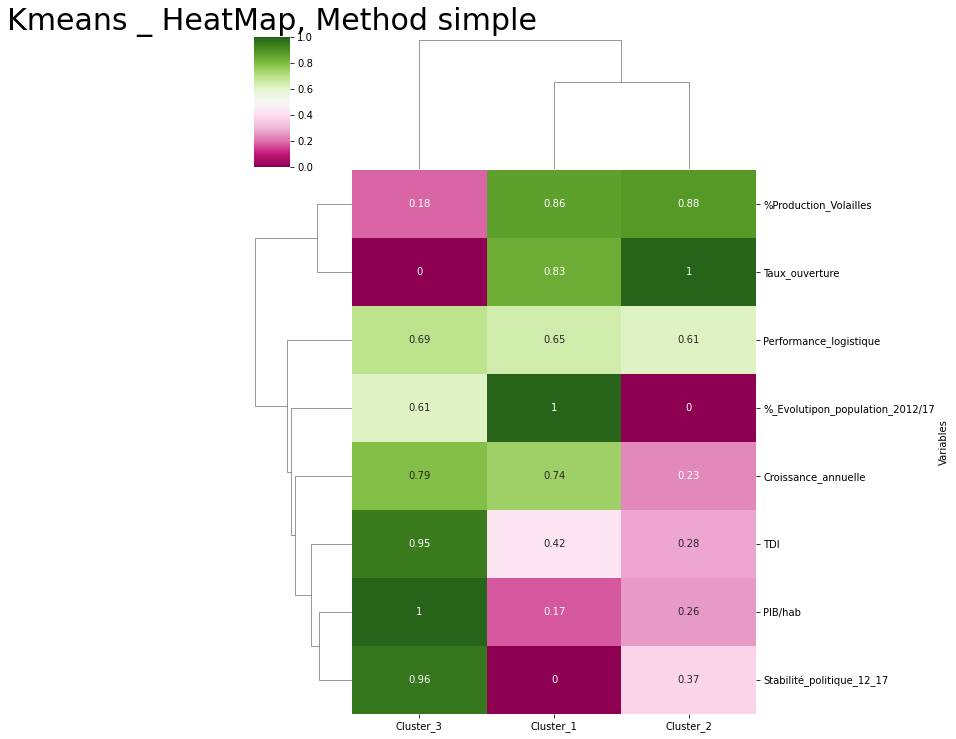

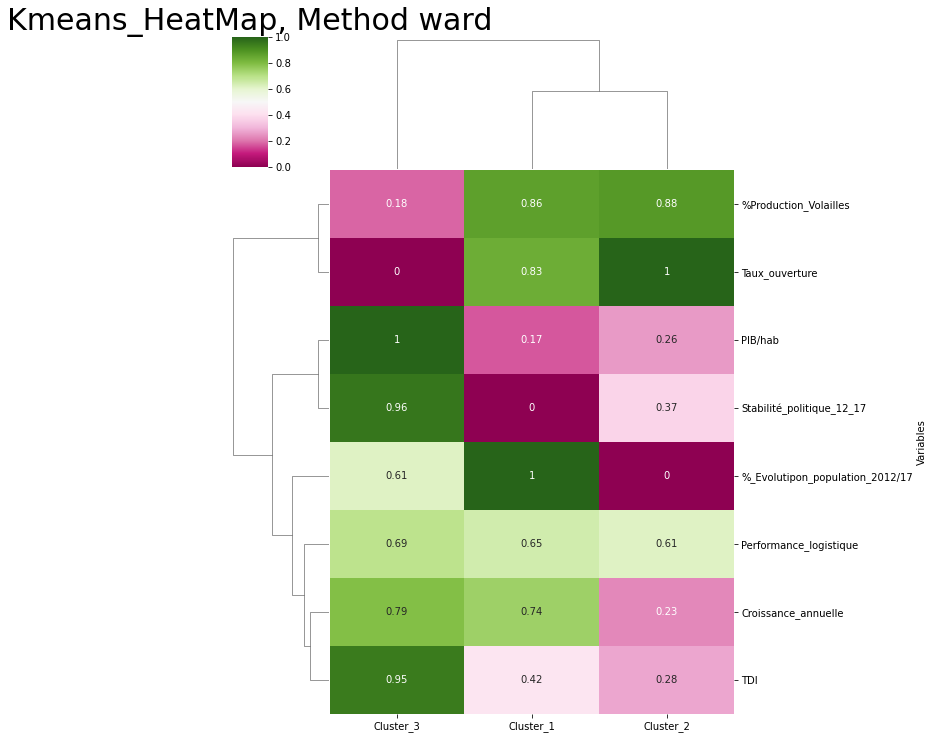

In [71]:
#http://www.python-simple.com/python-seaborn/seaborn-heatmap.php

# Libraries
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
 
# Data set

df = normalized_Cluster_poids_variable_Kmeans

plt.figure(figsize=(10, 30))  

# linkage method to use for calculating clusters: single
sns.clustermap(df, annot = True, cbar = True, cmap="PiYG", metric="euclidean", standard_scale=1, method="single")
plt.title("Kmeans _ HeatMap, Method simple", fontsize=30)
plt.show()

# linkage method to use for calculating clusters: ward
sns.clustermap(df, annot = True, cbar = True, cmap="PiYG", metric="euclidean", standard_scale=1, method="ward")
plt.title("Kmeans_HeatMap, Method ward", fontsize=30)
plt.savefig('Kmeans_Heatmap.png')
plt.show()


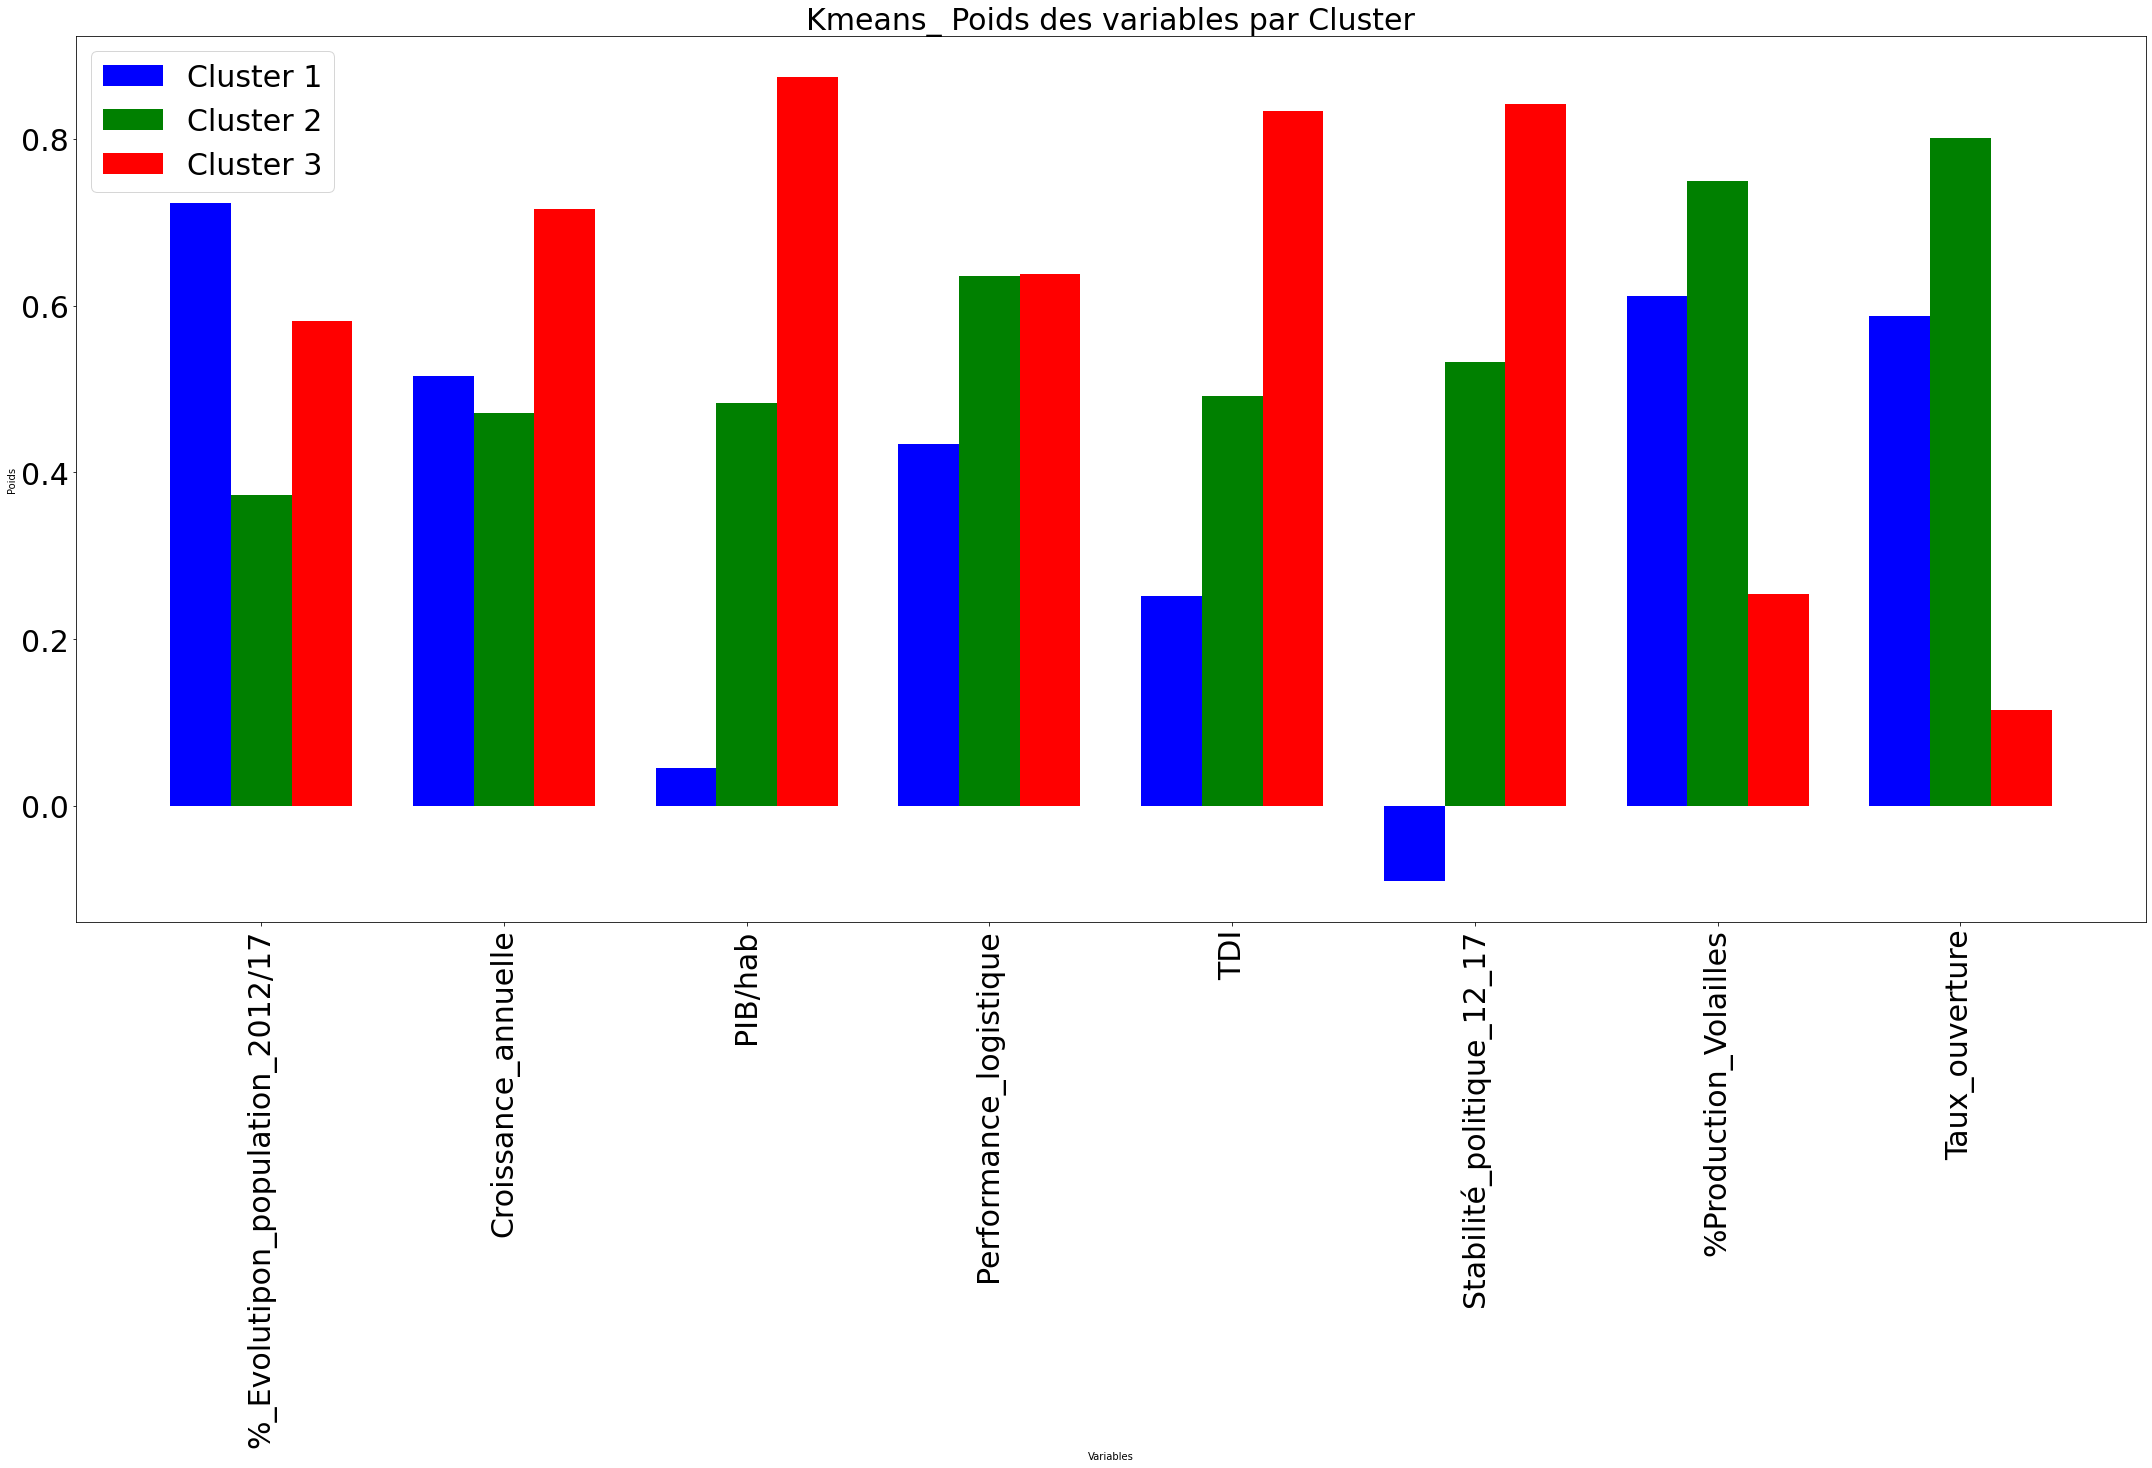

In [72]:

import numpy as np
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure



# data to plot
n_groups = 8
Cluster_1 = normalized_Cluster_poids_variable_Kmeans["Cluster_1"].values
Cluster_2 = normalized_Cluster_poids_variable_Kmeans["Cluster_2"].values
Cluster_3 = normalized_Cluster_poids_variable_Kmeans["Cluster_3"].values




# create plot
fig, ax = plt.subplots()
fig.set_size_inches(30, 20.5)
index = np.arange(n_groups)
bar_width = 0.25
opacity = 1

 
rects1 = plt.bar(index, Cluster_1, bar_width,
alpha=opacity,
color='b',
label='Cluster 1')

rects2 = plt.bar(index + bar_width, Cluster_2, bar_width,
alpha=opacity,
color='g',
label='Cluster 2')

rects3 = plt.bar(index + bar_width + bar_width , Cluster_3, bar_width,
alpha=opacity,
color='r',
label='Cluster 3')



plt.xlabel('Variables')
plt.ylabel('Poids')
plt.yticks(fontsize=30)
plt.title('Kmeans_ Poids des variables par Cluster',fontsize=30)
plt.xticks(index + bar_width, (normalized_Cluster_poids_variable_Kmeans.index))
plt.xticks(rotation=90,fontsize=30)
plt.legend(fontsize=30)

plt.tight_layout()
plt.savefig('Kmeans Poids_variable.png')
plt.show()

## Conclusion:

In [73]:
Proposition_client_Kmeans_1 = df_final_Kmeans.query("Cluster == 1")
Proposition_client_Kmeans_1

,Pays,%_Evolutipon_population_2012/17,Croissance_annuelle,PIB/hab,Performance_logistique,TDI,Stabilité_politique_12_17,%Production_Volailles,Taux_ouverture,Cluster,0,1,2
140,Australie,7.34,6.73,"57,628.86",3.79,25.71,0.98,48.60,1.12,1,"11,406.10","24,805.03","64,655.54"
141,États-Unis d'Amérique,3.52,3.59,"60,116.57",3.90,11.17,-3.13,60.60,9.07,1,"17,276.91","18,934.20","58,784.71"
142,Belgique,3.02,5.06,"44,020.07",4.00,118.78,0.67,30.58,2.93,1,"3,132.08","39,342.76","79,193.23"
143,Koweït,21.12,7.61,"29,754.61",3.02,63.95,0.03,50.91,0.32,1,"1,984.71","38,195.69","78,046.19"
144,Japon,-0.72,-0.93,"38,170.67",3.97,46.67,1.02,33.30,7.73,1,"77,190.32","40,979.35","1,129.57"
145,Allemagne,2.08,5.61,"44,552.06",4.13,52.56,0.77,20.60,8.63,1,485.56,"36,696.18","76,546.69"
146,Italie,1.33,4.57,"32,333.55",3.68,49.39,0.42,41.64,4.79,1,"48,498.72","12,287.77","27,562.89"
147,Israël,8.26,8.94,"42,850.55",3.37,20.17,-1.00,93.88,0.20,1,"4,761.13","40,972.03","80,822.52"
148,Bahamas,5.00,3.66,"32,719.15",2.74,76.60,1.51,50.00,0.06,1,"5,274.10","41,485.04","81,335.53"
149,Émirats arabes unis,3.78,6.56,"40,644.80",3.76,96.75,0.74,28.92,1.02,1,"5,430.75","41,641.59","81,492.06"


In [74]:
# Données médiane du Cluster 1
Proposition_client_Kmean1_median = pd.DataFrame(Proposition_client_Kmeans_1.median(numeric_only=True))
Proposition_client_Kmean1_median = Proposition_client_Kmean1_median.rename(columns={0:"Kmean_Cluster1"})
Proposition_client_Kmean1_median

,Kmean_Cluster1
%_Evolutipon_population_2012/17,3.60
Croissance_annuelle,5.64
PIB/hab,"43,268.57"
Performance_logistique,3.81
TDI,50.98
Stabilité_politique_12_17,0.84
%Production_Volailles,29.75
Taux_ouverture,2.22
Cluster,1.00
0,"4,674.49"


In [75]:
# Liste des Pays du Cluster 1
Proposition_client_Kmeans_1.Pays.to_list()

['Australie',
 "États-Unis d'Amérique",
 'Belgique',
 'Koweït',
 'Japon',
 'Allemagne',
 'Italie',
 'Israël',
 'Bahamas',
 'Émirats arabes unis',
 'Autriche',
 'Pays-Bas',
 'Suède',
 'Canada',
 'Chine - RAS de Hong-Kong',
 'Espagne',
 'Finlande',
 'Chine, Taiwan Province de',
 'Chypre',
 'France',
 'Danemark',
 'Malte',
 'Nouvelle-Calédonie',
 'République de Corée',
 'Nouvelle-Zélande',
 "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord"]

In [76]:
Proposition_client_Kmeans_2 = df_final_Kmeans.query("Cluster == 2")
Proposition_client_Kmeans_2

,Pays,%_Evolutipon_population_2012/17,Croissance_annuelle,PIB/hab,Performance_logistique,TDI,Stabilité_politique_12_17,%Production_Volailles,Taux_ouverture,Cluster,0,1,2
166,Norvège,5.64,7.09,"75,220.81",3.80,85.53,1.22,4.19,2.23,2,"4,099.58","40,310.40","80,160.90"
167,Islande,2.68,17.99,"73,231.73",3.31,21.74,1.30,1.25,0.53,2,"34,522.17","1,689.14","41,539.40"
168,Irlande,3.15,11.91,"71,391.01",3.75,114.24,0.94,15.97,0.75,2,94.44,"36,120.23","75,970.72"
169,Chine - RAS de Macao,10.38,10.07,"81,516.66",3.86,87.36,2.29,27.27,0.05,2,"53,993.89","17,783.00","22,067.76"
170,Luxembourg,11.50,3.49,"108,431.93",3.86,88.10,1.37,0.00,0.02,2,"5,401.12","41,611.99","81,462.47"
171,Suisse,5.59,0.37,"83,313.01",3.92,34.05,1.35,26.53,0.11,2,"4,211.40","40,422.29","80,272.78"


In [77]:
Proposition_client_Kmeans_2.Pays.to_list()

['Norvège',
 'Islande',
 'Irlande',
 'Chine - RAS de Macao',
 'Luxembourg',
 'Suisse']

In [78]:
Proposition_client_Kmeans = pd.concat([Proposition_client_Kmeans_1, Proposition_client_Kmeans_2])
Proposition_client_Kmeans


,Pays,%_Evolutipon_population_2012/17,Croissance_annuelle,PIB/hab,Performance_logistique,TDI,Stabilité_politique_12_17,%Production_Volailles,Taux_ouverture,Cluster,0,1,2
140,Australie,7.34,6.73,"57,628.86",3.79,25.71,0.98,48.60,1.12,1,"11,406.10","24,805.03","64,655.54"
141,États-Unis d'Amérique,3.52,3.59,"60,116.57",3.90,11.17,-3.13,60.60,9.07,1,"17,276.91","18,934.20","58,784.71"
142,Belgique,3.02,5.06,"44,020.07",4.00,118.78,0.67,30.58,2.93,1,"3,132.08","39,342.76","79,193.23"
143,Koweït,21.12,7.61,"29,754.61",3.02,63.95,0.03,50.91,0.32,1,"1,984.71","38,195.69","78,046.19"
144,Japon,-0.72,-0.93,"38,170.67",3.97,46.67,1.02,33.30,7.73,1,"77,190.32","40,979.35","1,129.57"
145,Allemagne,2.08,5.61,"44,552.06",4.13,52.56,0.77,20.60,8.63,1,485.56,"36,696.18","76,546.69"
146,Italie,1.33,4.57,"32,333.55",3.68,49.39,0.42,41.64,4.79,1,"48,498.72","12,287.77","27,562.89"
147,Israël,8.26,8.94,"42,850.55",3.37,20.17,-1.00,93.88,0.20,1,"4,761.13","40,972.03","80,822.52"
148,Bahamas,5.00,3.66,"32,719.15",2.74,76.60,1.51,50.00,0.06,1,"5,274.10","41,485.04","81,335.53"
149,Émirats arabes unis,3.78,6.56,"40,644.80",3.76,96.75,0.74,28.92,1.02,1,"5,430.75","41,641.59","81,492.06"


In [79]:
# Données médiane du Cluster 2
Proposition_client_Kmean2_median = pd.DataFrame(Proposition_client_Kmeans_2.median(numeric_only=True))
Proposition_client_Kmean2_median = Proposition_client_Kmean2_median.rename(columns={0:"Kmean_Cluster2"})
Proposition_client_Kmean2_median

,Kmean_Cluster2
%_Evolutipon_population_2012/17,5.61
Croissance_annuelle,8.58
PIB/hab,"78,368.74"
Performance_logistique,3.83
TDI,86.44
Stabilité_politique_12_17,1.33
%Production_Volailles,10.08
Taux_ouverture,0.32
Cluster,2.00
0,"4,806.26"


In [80]:
Proposition_client_Kmean_median = pd.merge(Proposition_client_Kmean1_median,Proposition_client_Kmean2_median, left_index=True, right_index=True)
Proposition_client_Kmean_median = Proposition_client_Kmean_median[:8]
Proposition_client_Kmean_median

,Kmean_Cluster1,Kmean_Cluster2
%_Evolutipon_population_2012/17,3.60,5.61
Croissance_annuelle,5.64,8.58
PIB/hab,"43,268.57","78,368.74"
Performance_logistique,3.81,3.83
TDI,50.98,86.44
Stabilité_politique_12_17,0.84,1.33
%Production_Volailles,29.75,10.08
Taux_ouverture,2.22,0.32


In [81]:
print("La 2ème proposition faites au client, le Cluster 2, comporte un petit nombre de pays, mais le pib par habitant moyen est très élevé, une attention particulière aux TO et au TDI")


La 2ème proposition faites au client, le Cluster 2, comporte un petit nombre de pays, mais le pib par habitant moyen est très élevé, une attention particulière aux TO et au TDI


# ACP

In [82]:
df_std

,Pays,%_Evolutipon_population_2012/17,Croissance_annuelle,PIB/hab,Performance_logistique,TDI,Stabilité_politique_12_17,%Production_Volailles,Taux_ouverture
0,Afghanistan,0.03,0.00,1.00,0.00,0.02,-0.00,0.03,0.01
1,Afrique du Sud,0.00,0.00,1.00,0.00,0.00,-0.00,0.01,0.00
2,Albanie,-0.00,0.00,1.00,0.00,0.01,0.00,0.01,0.00
3,Algérie,0.00,0.00,1.00,0.00,0.00,-0.00,0.01,0.00
4,Allemagne,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...
167,Émirats arabes unis,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
168,Équateur,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
169,États-Unis d'Amérique,0.00,0.00,1.00,0.00,0.00,-0.00,0.00,0.00
170,Éthiopie,0.02,0.01,1.00,0.00,0.00,-0.00,0.01,0.00


In [83]:
df_std.set_index("Pays", inplace=True)

In [84]:
df_std

,%_Evolutipon_population_2012/17,Croissance_annuelle,PIB/hab,Performance_logistique,TDI,Stabilité_politique_12_17,%Production_Volailles,Taux_ouverture
Pays,,,,,,,,
Afghanistan,0.03,0.00,1.00,0.00,0.02,-0.00,0.03,0.01
Afrique du Sud,0.00,0.00,1.00,0.00,0.00,-0.00,0.01,0.00
Albanie,-0.00,0.00,1.00,0.00,0.01,0.00,0.01,0.00
Algérie,0.00,0.00,1.00,0.00,0.00,-0.00,0.01,0.00
Allemagne,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...
Émirats arabes unis,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
Équateur,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
États-Unis d'Amérique,0.00,0.00,1.00,0.00,0.00,-0.00,0.00,0.00


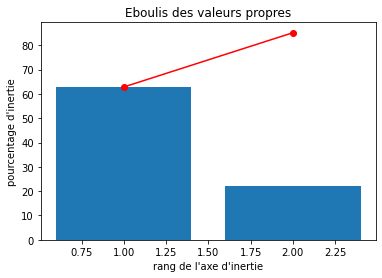

Explication de la variance observée dans les données,
la 1ère explique: 62.83%
la 2ème explique: 22.32%




<Figure size 432x288 with 0 Axes>

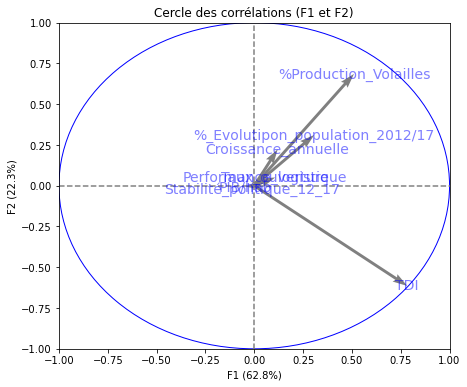

Contribution des variables aux composantes principale:

Ici, F1 represente la dépendance du pays en production et importation de Volailles
F2: Les pays ayany un fort développement



<Figure size 720x720 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

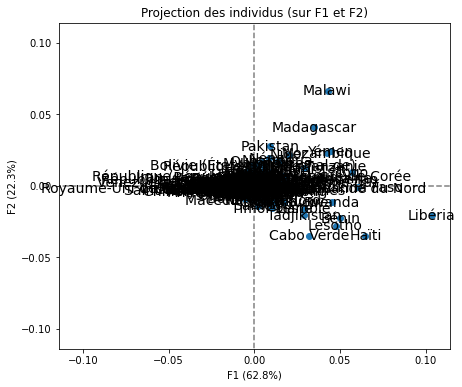

<Figure size 432x288 with 0 Axes>

In [85]:
from sklearn import decomposition
from sklearn import preprocessing
#from functions import 

# choix du nombre de composantes à calculer
n_comp = 2


#data_ACP = df_std.set_index("Pays")
# préparation des données pour l'ACP
names = df_std.index # ou data.index pour avoir les intitulés
features = df_std.columns

# Centrage et Réduction
X_scaled = df_std.values

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)


      # Eboulis des valeurs propres
display_scree_plot(pca)
plt.savefig('ACP _ Eboulis des valeurs propres.png')
print("""Explication de la variance observée dans les données,
la 1ère explique: {:.2%}""".format(pca.explained_variance_ratio_[0]))
print("la 2ème explique: {:.2%}""".format(pca.explained_variance_ratio_[1]))

print("")
print("")


      # Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))
plt.figure(figsize=(10,10))
plt.savefig('ACP _ Cercle des corrélations.png')
print("Contribution des variables aux composantes principale:")
print("")
print("Ici, F1 represente la dépendance du pays en production et importation de Volailles")
print("F2: Les pays ayany un fort développement")
print("")

# Projection des individus

X_projected = pca.transform(X_scaled)
fig = plt.figure(figsize=(15,15))
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], labels = np.array(names))
plt.savefig('ACP _ Projection des individus.png')


plt.show()

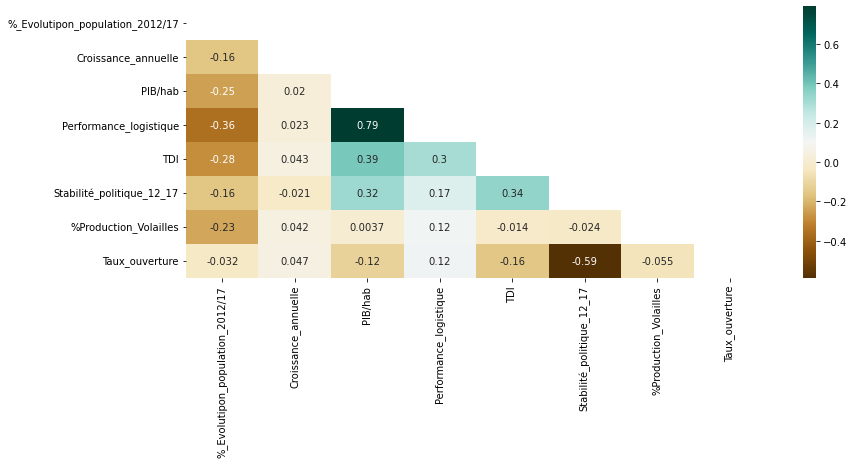

In [86]:
# Calculate pairwise-correlation
matrix = df_final.corr()

# Triangle de corrélations
mask = np.triu(np.ones_like(matrix, dtype='bool'))
plt.figure(figsize=(13, 5))
sns.heatmap(matrix, mask=mask, annot=True, cmap='BrBG')

plt.show()

## Dendogramme ACP

In [87]:
# Récupération du résultat de l'ACP
results_ACP = pd.DataFrame(X_projected)

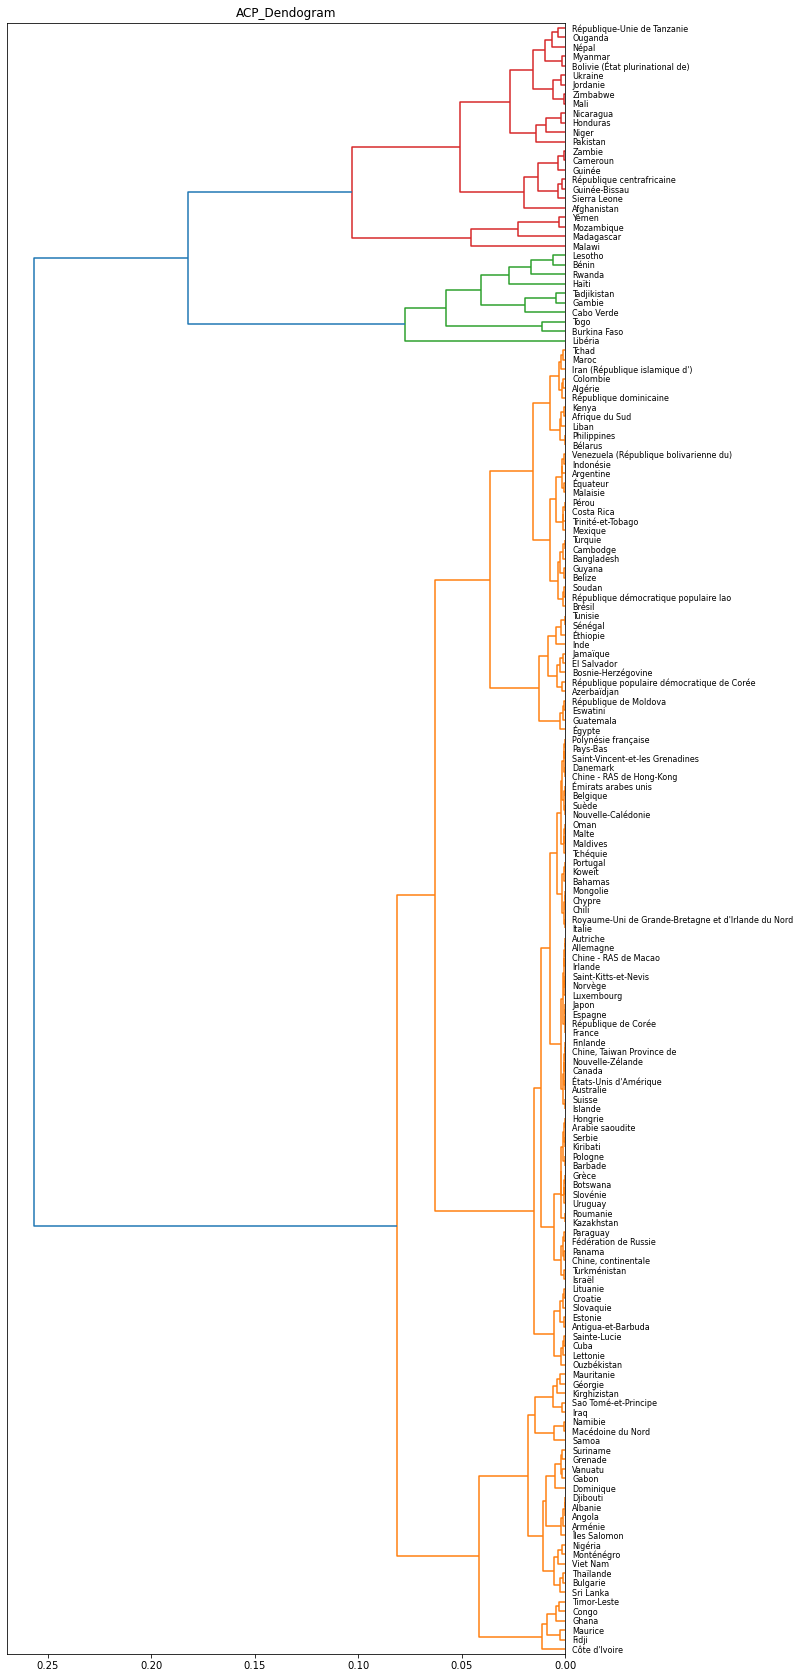

In [88]:
# Dendrogramme sur les 2 composantes de l'ACP
plt.figure(figsize=(10, 30))  
# Calculate the distance between each sample
Z = linkage(results_ACP, method='ward')
 
# Plot with Custom leaves
dendrogram(Z, leaf_font_size=8, labels=df_std.index, orientation='left',color_threshold=0.15)
plt.savefig('ACP_Dendogram.png')
plt.title('ACP_Dendogram')
plt.show()

In [89]:
# Extraction des clusters du dendogramme en definissant le nombre de cluster

from scipy.cluster.hierarchy import fcluster
k=3
clusters_ACP = fcluster(Z, k, criterion='maxclust')
clusters_ACP = pd.DataFrame(clusters_ACP)
clusters_ACP


,0
0,3
1,1
2,1
3,1
4,1
...,...
167,1
168,1
169,1
170,1


In [90]:
ACP_cluster = clusters_ACP.merge(df_final.Pays, left_index=True, right_index=True)
ACP_cluster = ACP_cluster.rename(columns={0:'Cluster'})
ACP_cluster

,Cluster,Pays
0,3,Afghanistan
1,1,Afrique du Sud
2,1,Albanie
3,1,Algérie
4,1,Allemagne
...,...,...
167,1,Émirats arabes unis
168,1,Équateur
169,1,États-Unis d'Amérique
170,1,Éthiopie


In [91]:
# Nombre de pays par cluster
ACP_cluster.groupby(["Cluster"]).agg({"Pays":"count"})

,Pays
Cluster,
1,138
2,10
3,24


In [92]:
ACP_cluster_nom = ACP_cluster.set_index("Pays")
for i in range(1,4):
    print(f"Group ACP {i}")
    print(", ".join(ACP_cluster_nom.loc[ACP_cluster_nom["Cluster"]==i].index.sort_values()))
    print(" ")

Group ACP 1
Afrique du Sud, Albanie, Algérie, Allemagne, Angola, Antigua-et-Barbuda, Arabie saoudite, Argentine, Arménie, Australie, Autriche, Azerbaïdjan, Bahamas, Bangladesh, Barbade, Belgique, Belize, Bosnie-Herzégovine, Botswana, Brésil, Bulgarie, Bélarus, Cambodge, Canada, Chili, Chine - RAS de Hong-Kong, Chine - RAS de Macao, Chine, Taiwan Province de, Chine, continentale, Chypre, Colombie, Congo, Costa Rica, Croatie, Cuba, Côte d'Ivoire, Danemark, Djibouti, Dominique, El Salvador, Espagne, Estonie, Eswatini, Fidji, Finlande, France, Fédération de Russie, Gabon, Ghana, Grenade, Grèce, Guatemala, Guyana, Géorgie, Hongrie, Inde, Indonésie, Iran (République islamique d'), Iraq, Irlande, Islande, Israël, Italie, Jamaïque, Japon, Kazakhstan, Kenya, Kirghizistan, Kiribati, Koweït, Lettonie, Liban, Lituanie, Luxembourg, Macédoine du Nord, Malaisie, Maldives, Malte, Maroc, Maurice, Mauritanie, Mexique, Mongolie, Monténégro, Namibie, Nigéria, Norvège, Nouvelle-Calédonie, Nouvelle-Zélande,

In [93]:
ACP = results_ACP.merge(ACP_cluster, left_index=True, right_index=True)
#ACP = ACP.set_index("Pays")
ACP

,0,1,Cluster,Pays
0,0.03,0.01,3,Afghanistan
1,-0.00,0.00,1,Afrique du Sud
2,-0.00,-0.01,1,Albanie
3,-0.01,0.00,1,Algérie
4,-0.01,-0.00,1,Allemagne
...,...,...,...,...
167,-0.01,-0.00,1,Émirats arabes unis
168,-0.01,0.00,1,Équateur
169,-0.01,-0.00,1,États-Unis d'Amérique
170,-0.00,0.01,1,Éthiopie


In [94]:
# Moyenne par cluster de chaque composante issue de l'ACP (centroïdes)
centroides = ACP.groupby(['Cluster']).mean().reset_index()
centroides['Cluster'] = 'centroïde'
centroides['Pays'] = 'centroïde'
centroides

,Cluster,0,1,Pays
0,centroïde,-0.01,-0.00,centroïde
1,centroïde,0.05,-0.02,centroïde
2,centroïde,0.02,0.02,centroïde


In [95]:
# Jointure des centroïdes sur la dataframe des 2 composantes
Cluster_groupe_ACP_results_centroides = pd.concat([ACP, centroides])
Cluster_groupe_ACP_results_centroides

,0,1,Cluster,Pays
0,0.03,0.01,3,Afghanistan
1,-0.00,0.00,1,Afrique du Sud
2,-0.00,-0.01,1,Albanie
3,-0.01,0.00,1,Algérie
4,-0.01,-0.00,1,Allemagne
...,...,...,...,...
170,-0.00,0.01,1,Éthiopie
171,-0.00,-0.01,1,Îles Salomon
0,-0.01,-0.00,centroïde,centroïde
1,0.05,-0.02,centroïde,centroïde


In [96]:
Cluster_groupe_ACP_results_centroides = Cluster_groupe_ACP_results_centroides.rename(columns={0:"PC1",1:"PC2"})

In [97]:
Cluster_groupe_ACP_results_centroides.Cluster.unique()

array([3, 1, 2, 'centroïde'], dtype=object)

## Nuage de point

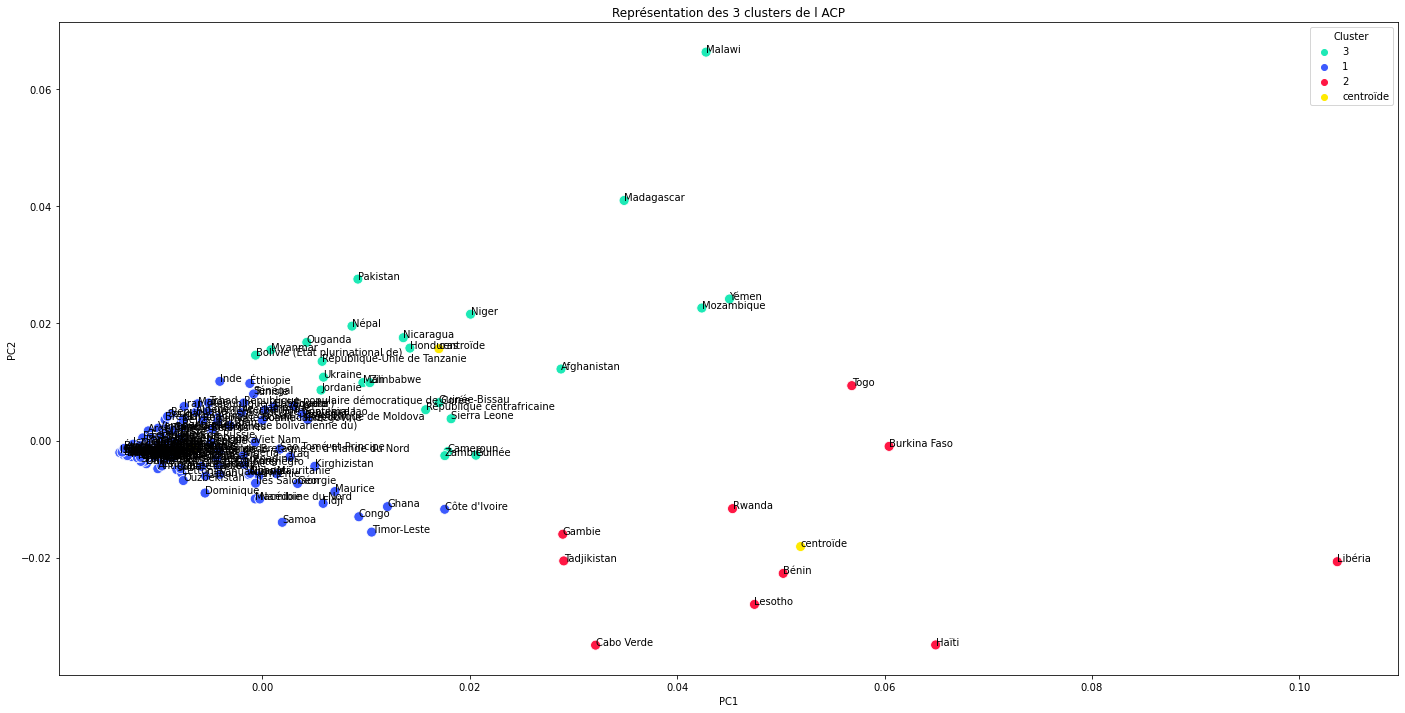

In [98]:

# Scatterplot des 2 composantes
plt.figure(figsize=(24,12))
ax = sns.scatterplot(data=Cluster_groupe_ACP_results_centroides, x='PC1', y='PC2', hue='Cluster', s=100, 
                     palette=[teal_a400, indigo_a400, red_a400, yellow_a400])

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))

label_point(Cluster_groupe_ACP_results_centroides['PC1'], Cluster_groupe_ACP_results_centroides['PC2'], Cluster_groupe_ACP_results_centroides['Pays'], plt.gca())
plt.title('Représentation des 3 clusters de l ACP')
plt.savefig('ACP Nuage de points.png')
plt.show()

In [99]:
df_final_ACP = df_final.merge(ACP, left_on="Pays", right_on="Pays", how="right")
df_final_ACP

,Pays,%_Evolutipon_population_2012/17,Croissance_annuelle,PIB/hab,Performance_logistique,TDI,Stabilité_politique_12_17,%Production_Volailles,Taux_ouverture,0,1,Cluster
0,Afghanistan,16.48,0.65,513.09,1.99,12.18,-2.57,13.40,2.83,0.03,0.01,3
1,Afrique du Sud,7.91,16.11,"6,121.88",3.54,26.13,-0.14,65.53,10.01,-0.00,0.00,1
2,Albanie,-1.03,9.85,"4,514.20",2.48,56.48,0.25,23.64,0.76,-0.00,-0.01,1
3,Algérie,10.71,4.14,"4,109.70",2.45,7.94,-1.14,41.54,0.71,-0.01,0.00,1
4,Allemagne,2.08,5.61,"44,552.06",4.13,52.56,0.77,20.60,8.63,-0.01,-0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...
167,Émirats arabes unis,3.78,6.56,"40,644.80",3.76,96.75,0.74,28.92,1.02,-0.01,-0.00,1
168,Équateur,8.47,2.53,"6,213.50",2.75,10.47,0.33,28.55,5.51,-0.01,0.00,1
169,États-Unis d'Amérique,3.52,3.59,"60,116.57",3.90,11.17,-3.13,60.60,9.07,-0.01,-0.00,1
170,Éthiopie,14.75,3.63,721.75,2.39,1.58,-1.52,5.60,0.35,-0.00,0.01,1


In [100]:
# Enregistrement CSV

df_final_ACP.to_csv(r'C:\Users\melle\FORMATION\P9_MENDY_Angèle\P9_Nobook_Done\df_sortie_Analyse\df_final_ACP.csv')  

In [101]:
Cluster_poids_variable_ACP = df_final_ACP.groupby("Cluster").median()
Cluster_poids_variable_ACP = Cluster_poids_variable_ACP.T
Cluster_poids_variable_ACP = Cluster_poids_variable_ACP.reset_index()
#Cluster_poids_variable_ACP = Cluster_poids_variable_ACP.set_index("index")
Cluster_poids_variable_ACP

Cluster,index,1,2,3
0,%_Evolutipon_population_2012/17,5.20,13.61,13.82
1,Croissance_annuelle,6.23,4.85,5.95
2,PIB/hab,"8,364.62",803.32,890.83
3,Performance_logistique,2.80,2.39,2.43
4,TDI,36.36,51.94,11.19
5,Stabilité_politique_12_17,0.18,-0.23,-0.74
6,%Production_Volailles,27.10,17.81,24.02
7,Taux_ouverture,1.28,4.42,2.66
8,0,-0.01,0.05,0.01
9,1,-0.00,-0.02,0.01


In [102]:
Cluster_poids_variable_ACP

Cluster,index,1,2,3
0,%_Evolutipon_population_2012/17,5.20,13.61,13.82
1,Croissance_annuelle,6.23,4.85,5.95
2,PIB/hab,"8,364.62",803.32,890.83
3,Performance_logistique,2.80,2.39,2.43
4,TDI,36.36,51.94,11.19
5,Stabilité_politique_12_17,0.18,-0.23,-0.74
6,%Production_Volailles,27.10,17.81,24.02
7,Taux_ouverture,1.28,4.42,2.66
8,0,-0.01,0.05,0.01
9,1,-0.00,-0.02,0.01


In [103]:
data_norm_acp = (Cluster_poids_variable_ACP.set_index("index"))
normalized_Cluster_poids_variable_ACP = pd.DataFrame(normalize(data_norm_acp))
normalized_Cluster_poids_variable_ACP = normalized_Cluster_poids_variable_ACP.rename(columns={0:"Cluster_1"})
normalized_Cluster_poids_variable_ACP = normalized_Cluster_poids_variable_ACP.rename(columns={1:"Cluster_2"})
normalized_Cluster_poids_variable_ACP = normalized_Cluster_poids_variable_ACP.rename(columns={2:"Cluster_3"})
normalized_Cluster_poids_variable_ACP

,Cluster_1,Cluster_2,Cluster_3
0,0.26,0.68,0.69
1,0.63,0.49,0.60
2,0.99,0.10,0.11
3,0.63,0.54,0.55
4,0.56,0.81,0.17
5,0.22,-0.29,-0.93
6,0.67,0.44,0.60
7,0.24,0.83,0.50
8,-0.17,0.94,0.29
9,-0.08,-0.82,0.56


In [104]:
normalized_Cluster_poids_variable_ACP = Cluster_poids_variable_ACP.merge(normalized_Cluster_poids_variable_ACP,left_index=True, right_index=True)
normalized_Cluster_poids_variable_ACP

,index,1,2,3,Cluster_1,Cluster_2,Cluster_3
0,%_Evolutipon_population_2012/17,5.20,13.61,13.82,0.26,0.68,0.69
1,Croissance_annuelle,6.23,4.85,5.95,0.63,0.49,0.60
2,PIB/hab,"8,364.62",803.32,890.83,0.99,0.10,0.11
3,Performance_logistique,2.80,2.39,2.43,0.63,0.54,0.55
4,TDI,36.36,51.94,11.19,0.56,0.81,0.17
5,Stabilité_politique_12_17,0.18,-0.23,-0.74,0.22,-0.29,-0.93
6,%Production_Volailles,27.10,17.81,24.02,0.67,0.44,0.60
7,Taux_ouverture,1.28,4.42,2.66,0.24,0.83,0.50
8,0,-0.01,0.05,0.01,-0.17,0.94,0.29
9,1,-0.00,-0.02,0.01,-0.08,-0.82,0.56


In [105]:
normalized_Cluster_poids_variable_ACP = normalized_Cluster_poids_variable_ACP[["index",'Cluster_1', 'Cluster_2', 'Cluster_3']]
normalized_Cluster_poids_variable_ACP = normalized_Cluster_poids_variable_ACP.rename(columns={"index":"Variables"})
normalized_Cluster_poids_variable_ACP = normalized_Cluster_poids_variable_ACP.set_index("Variables")
normalized_Cluster_poids_variable_ACP = normalized_Cluster_poids_variable_ACP[:8]
normalized_Cluster_poids_variable_ACP

,Cluster_1,Cluster_2,Cluster_3
Variables,,,
%_Evolutipon_population_2012/17,0.26,0.68,0.69
Croissance_annuelle,0.63,0.49,0.60
PIB/hab,0.99,0.10,0.11
Performance_logistique,0.63,0.54,0.55
TDI,0.56,0.81,0.17
Stabilité_politique_12_17,0.22,-0.29,-0.93
%Production_Volailles,0.67,0.44,0.60
Taux_ouverture,0.24,0.83,0.50


In [106]:
normalized_Cluster_poids_variable_ACP = normalized_Cluster_poids_variable_ACP[:8]
normalized_Cluster_poids_variable_ACP

,Cluster_1,Cluster_2,Cluster_3
Variables,,,
%_Evolutipon_population_2012/17,0.26,0.68,0.69
Croissance_annuelle,0.63,0.49,0.60
PIB/hab,0.99,0.10,0.11
Performance_logistique,0.63,0.54,0.55
TDI,0.56,0.81,0.17
Stabilité_politique_12_17,0.22,-0.29,-0.93
%Production_Volailles,0.67,0.44,0.60
Taux_ouverture,0.24,0.83,0.50


<Figure size 720x2160 with 0 Axes>

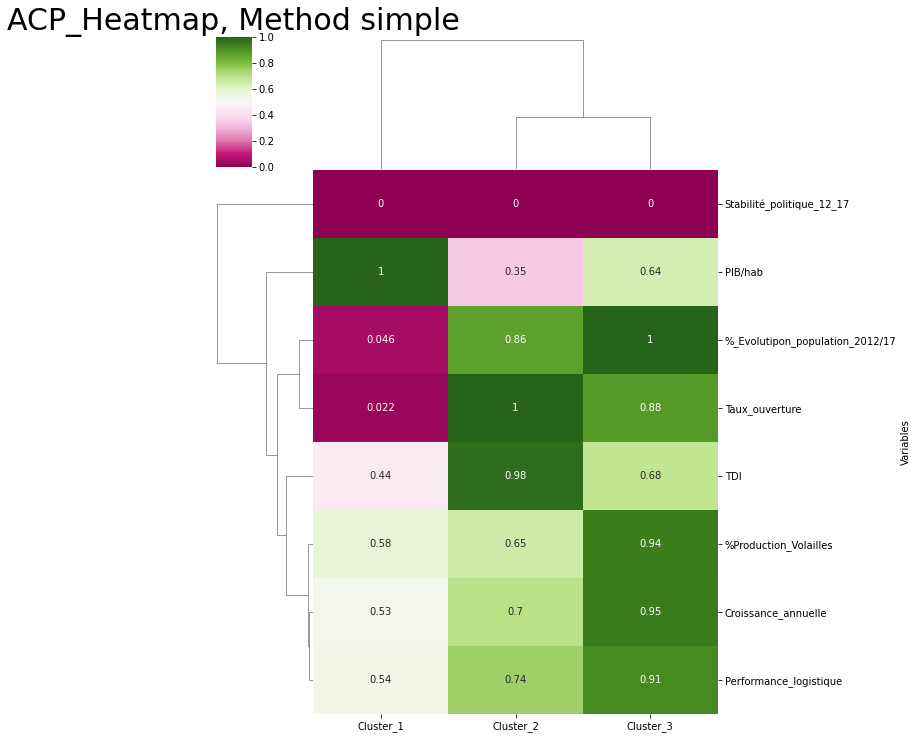

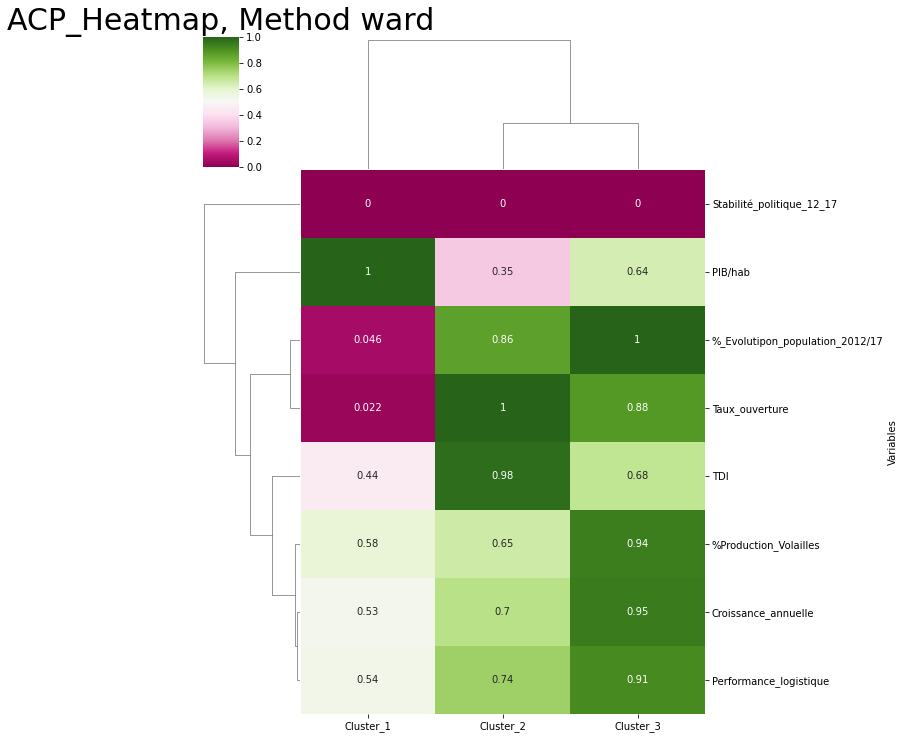

In [107]:
# http://www.python-simple.com/python-seaborn/seaborn-heatmap.php

# Libraries
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
 
# Data set

df = normalized_Cluster_poids_variable_ACP

plt.figure(figsize=(10, 30))  

# linkage method to use for calculating clusters: single
sns.clustermap(df, annot = True, cbar = True, cmap="PiYG", metric="euclidean", standard_scale=1, method="single")
plt.title("ACP_Heatmap, Method simple", fontsize=30)
plt.show()

# linkage method to use for calculating clusters: ward
sns.clustermap(df, annot = True, cbar = True, cmap="PiYG", metric="euclidean", standard_scale=1, method="ward")
plt.title("ACP_Heatmap, Method ward", fontsize=30)
plt.savefig('ACP_Heatmap.png')
plt.show()










In [108]:
normalized_Cluster_poids_variable_ACP

,Cluster_1,Cluster_2,Cluster_3
Variables,,,
%_Evolutipon_population_2012/17,0.26,0.68,0.69
Croissance_annuelle,0.63,0.49,0.60
PIB/hab,0.99,0.10,0.11
Performance_logistique,0.63,0.54,0.55
TDI,0.56,0.81,0.17
Stabilité_politique_12_17,0.22,-0.29,-0.93
%Production_Volailles,0.67,0.44,0.60
Taux_ouverture,0.24,0.83,0.50


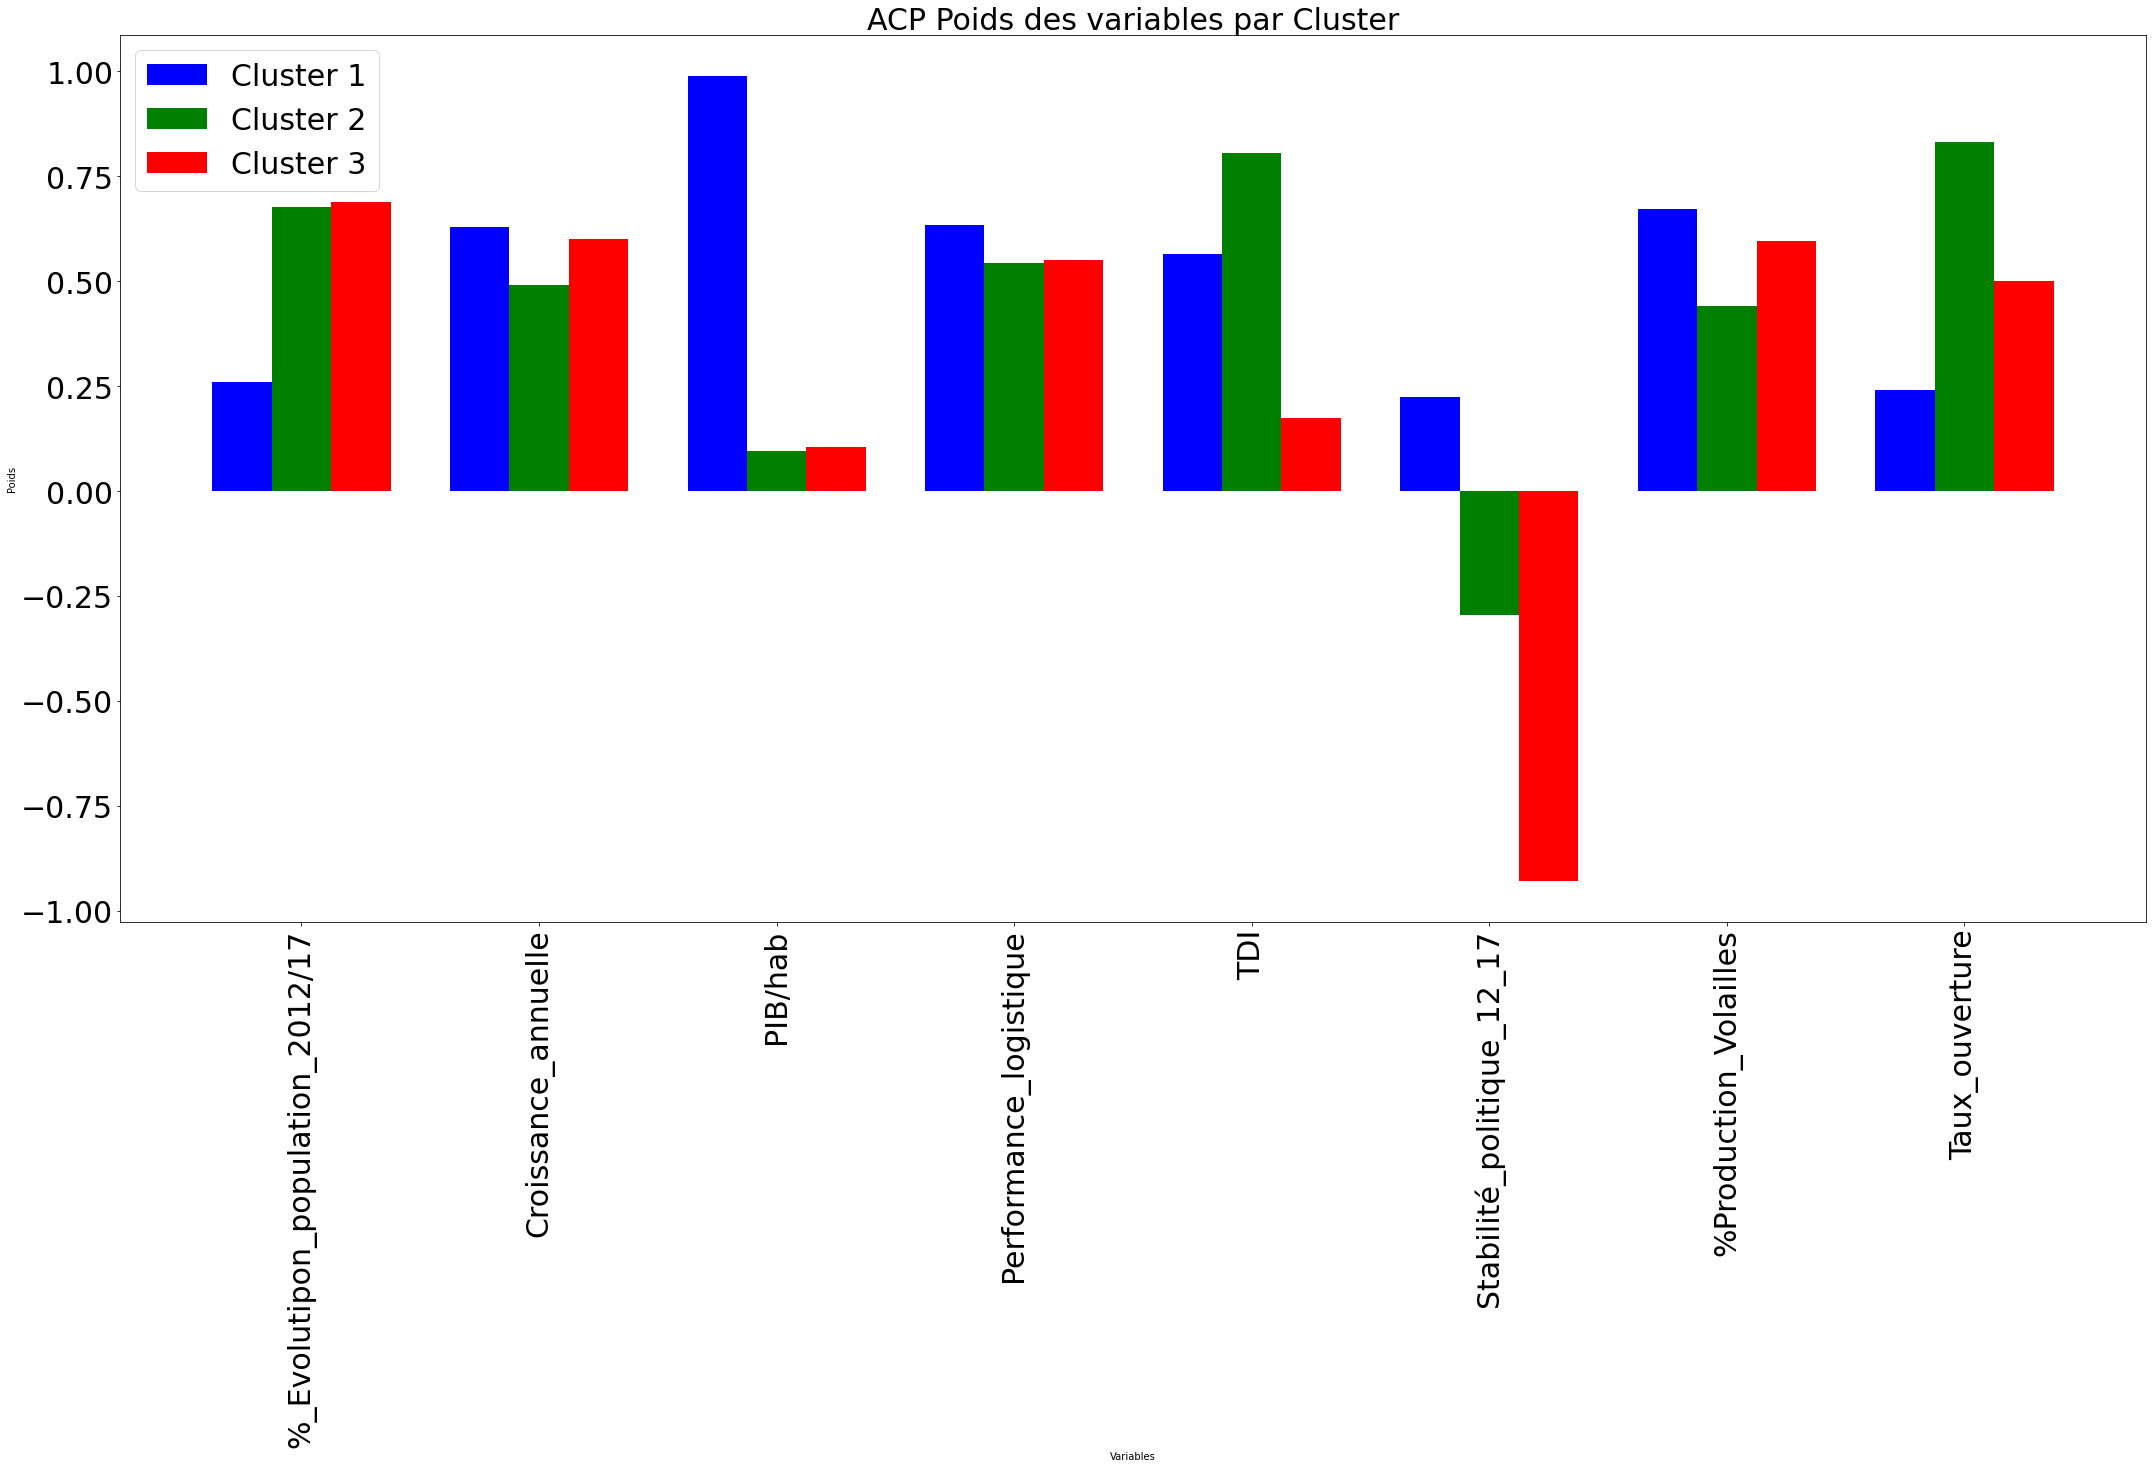

In [110]:

import numpy as np
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure



# data to plot
n_groups = 8

Cluster_1 = normalized_Cluster_poids_variable_ACP["Cluster_1"].values
Cluster_2 = normalized_Cluster_poids_variable_ACP["Cluster_2"].values
Cluster_3 = normalized_Cluster_poids_variable_ACP["Cluster_3"].values




# create plot
fig, ax = plt.subplots()
fig.set_size_inches(30, 20.5)
index = np.arange(n_groups)
bar_width = 0.25
opacity = 1

 
rects1 = plt.bar(index, Cluster_1, bar_width,
alpha=opacity,
color='b',
label='Cluster 1')

rects2 = plt.bar(index + bar_width, Cluster_2, bar_width,
alpha=opacity,
color='g',
label='Cluster 2')

rects3 = plt.bar(index + bar_width + bar_width , Cluster_3, bar_width,
alpha=opacity,
color='r',
label='Cluster 3')



plt.xlabel('Variables')
plt.ylabel('Poids')
plt.yticks(fontsize=30)
plt.title('ACP Poids des variables par Cluster',fontsize=30)
plt.xticks(index + bar_width, (normalized_Cluster_poids_variable_Kmeans.index))
plt.xticks(rotation=90,fontsize=30)
plt.legend(fontsize=30)

plt.tight_layout()
plt.savefig('ACP Poids variable.png')
plt.show()

## Conclusion

In [126]:
Proposition_client_ACP = df_final_ACP.query("Cluster == 1")
Proposition_client_ACP

,Pays,%_Evolutipon_population_2012/17,Croissance_annuelle,PIB/hab,Performance_logistique,TDI,Stabilité_politique_12_17,%Production_Volailles,Taux_ouverture,0,1,Cluster
1,Afrique du Sud,7.91,16.11,"6,121.88",3.54,26.13,-0.14,65.53,10.01,-0.00,0.00,1
2,Albanie,-1.03,9.85,"4,514.20",2.48,56.48,0.25,23.64,0.76,-0.00,-0.01,1
3,Algérie,10.71,4.14,"4,109.70",2.45,7.94,-1.14,41.54,0.71,-0.01,0.00,1
4,Allemagne,2.08,5.61,"44,552.06",4.13,52.56,0.77,20.60,8.63,-0.01,-0.00,1
5,Angola,18.75,16.82,"4,095.81",2.31,50.66,-0.39,7.51,6.99,-0.00,-0.01,1
...,...,...,...,...,...,...,...,...,...,...,...,...
167,Émirats arabes unis,3.78,6.56,"40,644.80",3.76,96.75,0.74,28.92,1.02,-0.01,-0.00,1
168,Équateur,8.47,2.53,"6,213.50",2.75,10.47,0.33,28.55,5.51,-0.01,0.00,1
169,États-Unis d'Amérique,3.52,3.59,"60,116.57",3.90,11.17,-3.13,60.60,9.07,-0.01,-0.00,1
170,Éthiopie,14.75,3.63,721.75,2.39,1.58,-1.52,5.60,0.35,-0.00,0.01,1


In [128]:
# Données médiane du Cluster 1
Proposition_client_ACP_median = pd.DataFrame(Proposition_client_ACP.set_index("Pays").median())
Proposition_client_ACP_median = Proposition_client_ACP1_median.rename(columns={0:"ACP_Cluster1"})
Proposition_client_ACP_median

,ACP_Cluster1
%_Evolutipon_population_2012/17,5.20
Croissance_annuelle,6.23
PIB/hab,"8,364.62"
Performance_logistique,2.80
TDI,36.36
Stabilité_politique_12_17,0.18
%Production_Volailles,27.10
Taux_ouverture,1.28
0,-0.01
1,-0.00


# Comparaison

In [130]:
Proposition_client1 = pd.merge(Proposition_client_Kmean_median,Proposition_client_dendo_median, left_index=True, right_index=True)
Proposition_client = pd.merge(Proposition_client1,Proposition_client_ACP_median, left_index=True, right_index=True)
Proposition_client = Proposition_client[['Kmean_Cluster1', 'Kmean_Cluster2', 'Dendogramme_Cluster2',
       'ACP_Cluster1']] 
Proposition_client

,Kmean_Cluster1,Kmean_Cluster2,Dendogramme_Cluster2,ACP_Cluster1
%_Evolutipon_population_2012/17,3.60,5.61,4.33,5.20
Croissance_annuelle,5.64,8.58,6.50,6.23
PIB/hab,"43,268.57","78,368.74","10,259.21","8,364.62"
Performance_logistique,3.81,3.83,2.97,2.80
TDI,50.98,86.44,37.35,36.36
Stabilité_politique_12_17,0.84,1.33,0.27,0.18
%Production_Volailles,29.75,10.08,28.34,27.10
Taux_ouverture,2.22,0.32,1.33,1.28


In [131]:
Proposition_client.to_csv(r'C:\Users\melle\FORMATION\P9_MENDY_Angèle\P9_Nobook_Done\df_sortie_Analyse\Proposition_client.csv')  

In [132]:
normalized_Proposition_client1 = pd.DataFrame(normalize(Proposition_client))
normalized_Proposition_client1

,0,1,2,3
0,0.38,0.59,0.46,0.55
1,0.41,0.63,0.48,0.46
2,0.48,0.87,0.11,0.09
3,0.56,0.57,0.44,0.41
4,0.45,0.76,0.33,0.32
5,0.52,0.83,0.17,0.11
6,0.59,0.20,0.56,0.54
7,0.76,0.11,0.46,0.44


In [133]:
Proposition_client.columns

Index(['Kmean_Cluster1', 'Kmean_Cluster2', 'Dendogramme_Cluster2',
       'ACP_Cluster1'],
      dtype='object')

In [134]:
# Récupération du nom des colonnes

normalized_Proposition_client = (pd.DataFrame(normalized_Proposition_client1.values , index=Proposition_client.index, columns=Proposition_client.columns))
normalized_Proposition_client = normalized_Proposition_client[:8]
normalized_Proposition_client

,Kmean_Cluster1,Kmean_Cluster2,Dendogramme_Cluster2,ACP_Cluster1
%_Evolutipon_population_2012/17,0.38,0.59,0.46,0.55
Croissance_annuelle,0.41,0.63,0.48,0.46
PIB/hab,0.48,0.87,0.11,0.09
Performance_logistique,0.56,0.57,0.44,0.41
TDI,0.45,0.76,0.33,0.32
Stabilité_politique_12_17,0.52,0.83,0.17,0.11
%Production_Volailles,0.59,0.20,0.56,0.54
Taux_ouverture,0.76,0.11,0.46,0.44


In [135]:
normalized_Proposition_client.to_csv(r'C:\Users\melle\FORMATION\P9_MENDY_Angèle\P9_Nobook_Done\df_sortie_Analyse\normalized_Proposition_client.csv')  

In [136]:
normalized_Proposition_client.columns

Index(['Kmean_Cluster1', 'Kmean_Cluster2', 'Dendogramme_Cluster2',
       'ACP_Cluster1'],
      dtype='object')

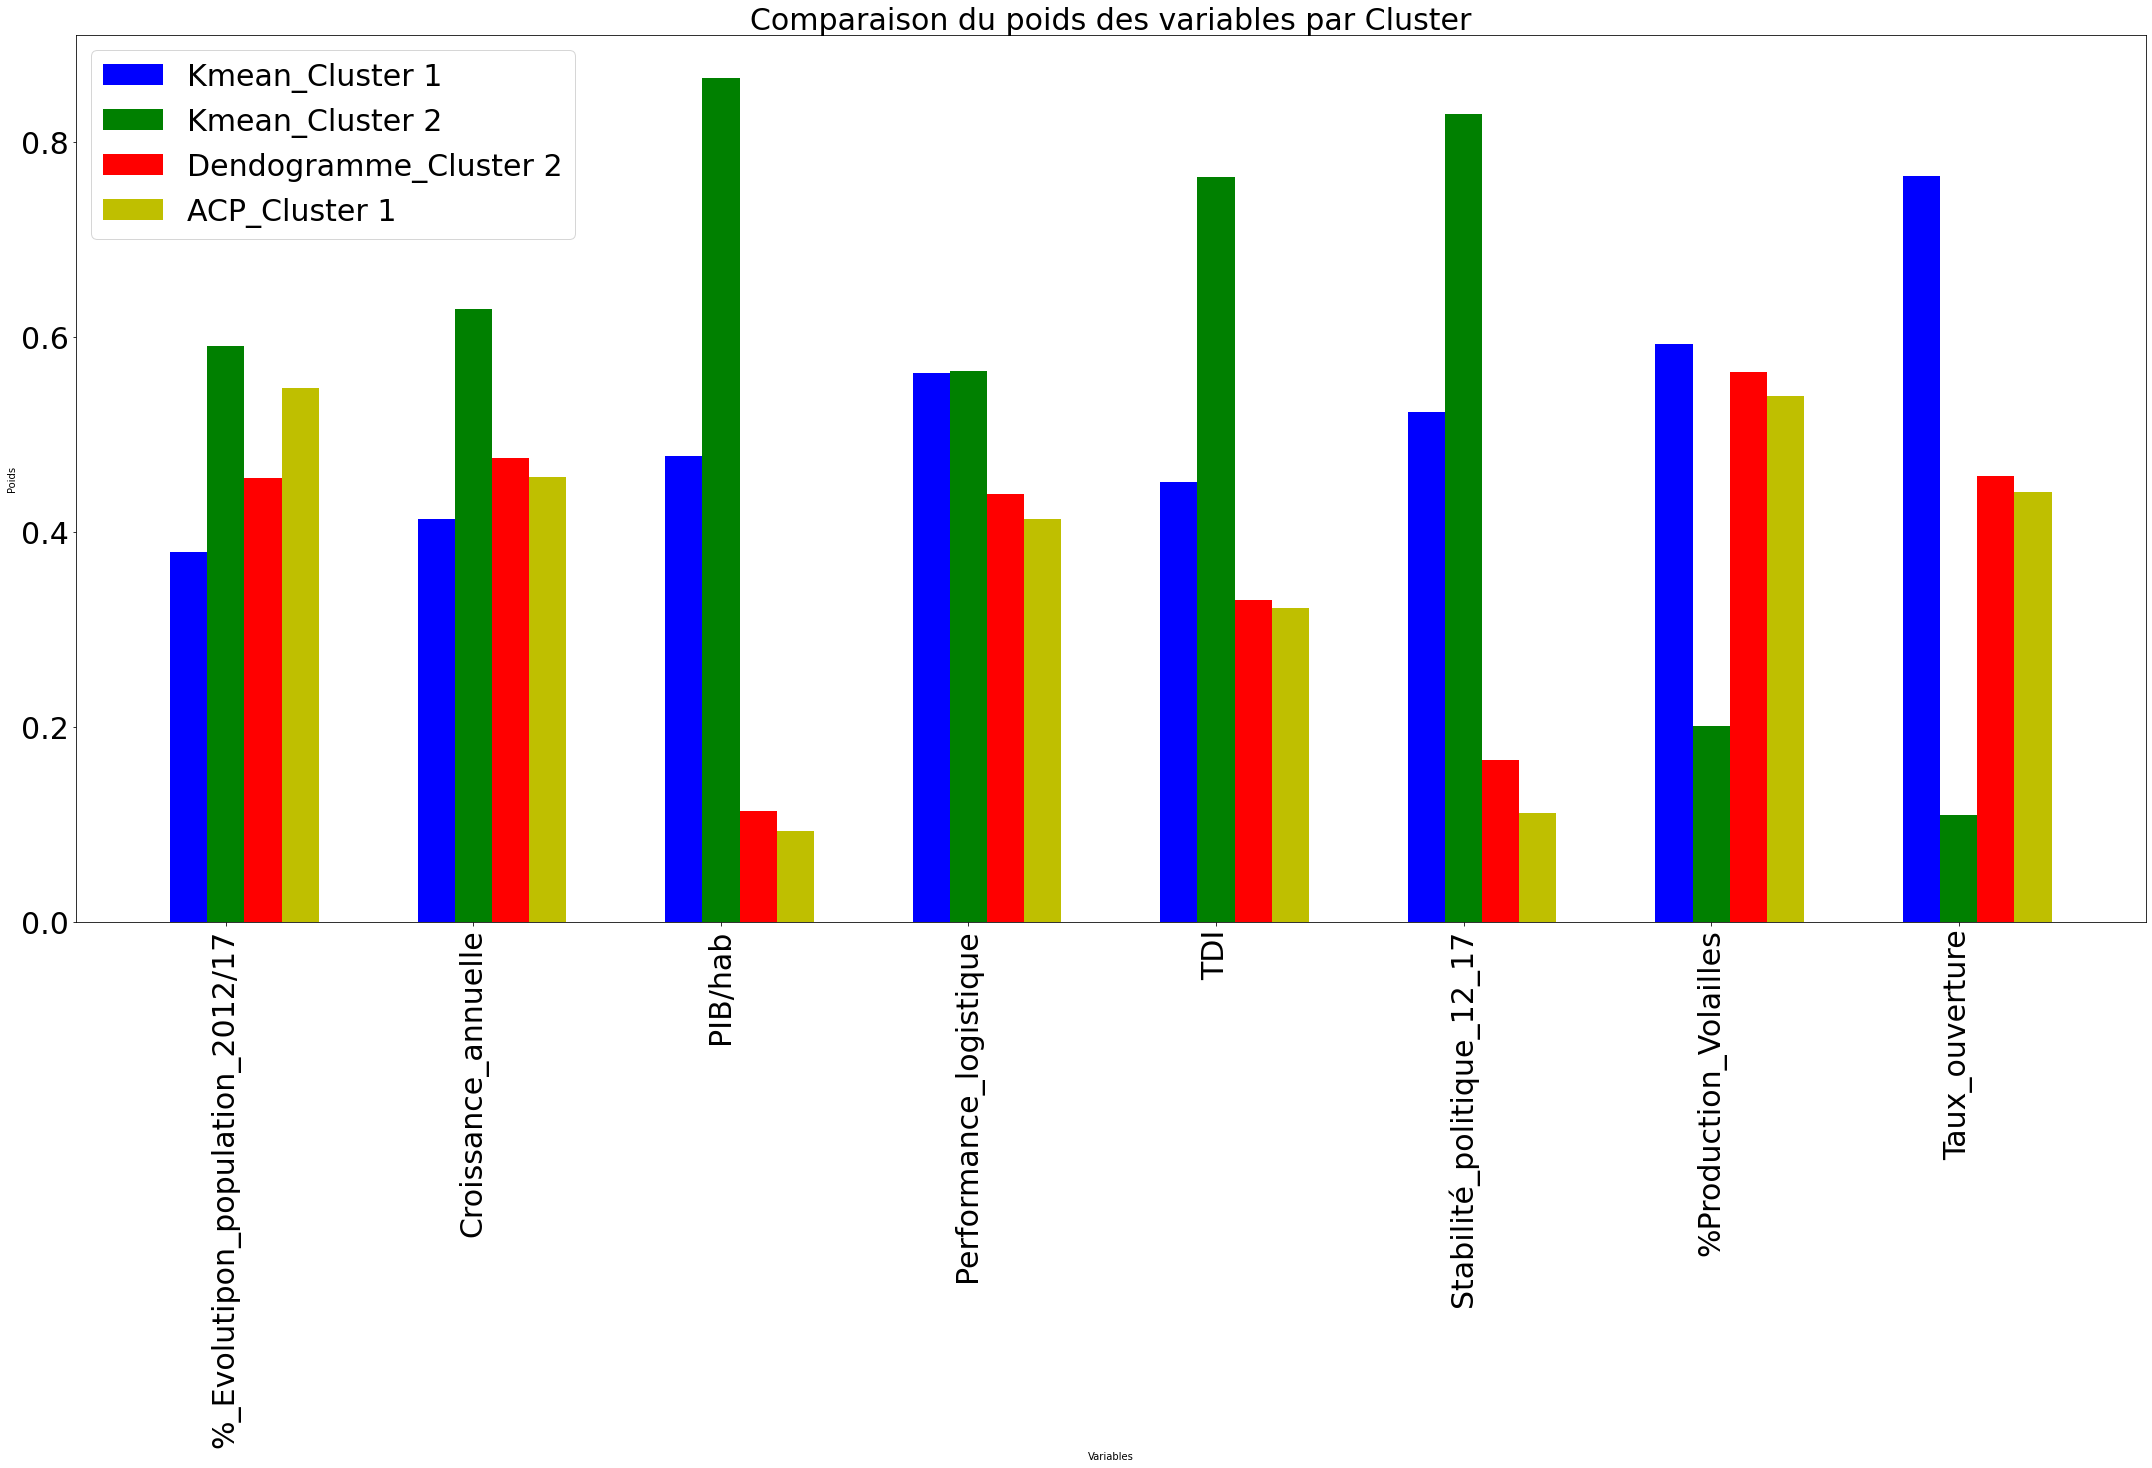

In [139]:

import numpy as np
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure



# data to plot
n_groups = 8
Kmean_Cluster1 = normalized_Proposition_client["Kmean_Cluster1"].values
Kmean_Cluster2 = normalized_Proposition_client["Kmean_Cluster2"].values
Dendogramme_Cluster2 = normalized_Proposition_client["Dendogramme_Cluster2"].values
ACP_Cluster1 = normalized_Proposition_client["ACP_Cluster1"].values




# create plot
fig, ax = plt.subplots()
fig.set_size_inches(30, 20.5)
index = np.arange(n_groups)
bar_width = 0.15
opacity = 1

 
rects1 = plt.bar(index, Kmean_Cluster1, bar_width,
alpha=opacity,
color='b',
label='Kmean_Cluster 1')

rects2 = plt.bar(index + bar_width, Kmean_Cluster2, bar_width,
alpha=opacity,
color='g',
label='Kmean_Cluster 2')

rects3 = plt.bar(index + bar_width + bar_width , Dendogramme_Cluster2, bar_width,
alpha=opacity,
color='r',
label='Dendogramme_Cluster 2')

rects4 = plt.bar(index + bar_width + bar_width + bar_width, ACP_Cluster1, bar_width,
alpha=opacity,
color='y',
label='ACP_Cluster 1')




plt.xlabel('Variables')
plt.ylabel('Poids')
plt.yticks(fontsize=30)
plt.title('Comparaison du poids des variables par Cluster',fontsize=30)
plt.xticks(index + bar_width, (normalized_Proposition_client.index))
plt.xticks(rotation=90,fontsize=30)
plt.legend(fontsize=30)

plt.tight_layout()
plt.savefig('Comparaison_Poids variables par Cluster.png')
plt.show()

In [140]:
# Fichiers Continent

Région = pd.read_csv(r'C:\Users\melle\OneDrive\Bureau\FORMATION\P8_Mendy_Angèle\SOURCE\Région.csv', delimiter=";")
Région = Région.rename(columns={"Zone":"Pays"})
Région.sample(1)

,Continent,Pays
165,Afrique,Zimbabwe


In [151]:
Continent_Proposition_client_dendogramme = Proposition_client_dendogramme.merge(Région,on="Pays", how="left")
Continent_Proposition_client_dendogramme = Continent_Proposition_client_dendogramme.groupby(["Continent","Cluster"]).median()
Continent_Proposition_client_dendogramme = Continent_Proposition_client_dendogramme.drop(columns=[0,1,2,3], axis=1)
Continent_Proposition_client_dendogramme

,,%_Evolutipon_population_2012/17,Croissance_annuelle,PIB/hab,Performance_logistique,TDI,Stabilité_politique_12_17,%Production_Volailles,Taux_ouverture
Continent,Cluster,,,,,,,,
Afrique,2,10.71,6.90,"3,082.60",2.57,22.22,-0.41,11.46,1.78
Amérique centrale,2,7.66,3.51,"10,546.52",2.89,25.17,0.14,50.17,0.71
Amérique du Nord,2,4.35,5.25,"52,511.66",3.88,22.57,-0.98,47.36,6.24
Amérique du Sud,2,4.33,4.54,"8,541.21",2.76,25.67,0.40,28.55,0.17
Asie,2,7.89,6.87,"6,585.16",2.74,24.64,-0.13,28.84,1.64
Australie et Nouvelle-Zélande,2,6.28,7.43,"50,657.73",3.70,24.30,1.23,36.14,0.96
Europe,2,0.76,7.39,"25,768.48",3.35,67.97,0.75,26.30,1.30
Océanie,2,4.82,4.09,"5,160.54",2.73,71.14,0.89,4.42,0.59


In [153]:
Continent_Proposition_client_Kmeans = Proposition_client_Kmeans.merge(Région,on="Pays", how="left")
Continent_Proposition_client_Kmeans = Continent_Proposition_client_Kmeans.groupby(["Continent","Cluster"]).median()
Continent_Proposition_client_Kmeans = Continent_Proposition_client_Kmeans.drop(columns=[0,1,2], axis=1)
Continent_Proposition_client_Kmeans

%_Evolutipon_population_2012/17  \
Continent                     Cluster                                    
Amérique du Nord              1                                   4.35   
Amérique du Sud               1                                   5.00   
Asie                          1                                   3.78   
                              2                                  10.38   
Australie et Nouvelle-Zélande 1                                   6.28   
Europe                        1                                   2.08   
                              2                                   5.59   
Océanie                       1                                   6.33   

                                       Croissance_annuelle   PIB/hab  \
Continent                     Cluster                                  
Amérique du Nord              1                       5.25 52,511.66   
Amérique du Sud               1                       3.66 32,719.15   
Asie                          1                       7.61 38,170.67   
                              2                      10.07 81,516.66   
Australie et Nouvelle-Zélande 1                       7.43 50,657.73   
Europe                        1                       5.61 44,552.06   
                              2                       7.09 75,220.81   
Océanie                       1                       3.95 34,128.63   

                                       Performance_logistique   TDI  \
Continent                     Cluster                                 
Amérique du Nord              1                          3.88 22.57   
Amérique du Sud               1                          2.74 76.60   
Asie                          1                          3.64 46.67   
                              2                          3.86 87.36   
Australie et Nouvelle-Zélande 1                          3.70 24.30   
Europe                        1                          3.89 59.73   
                              2                          3.80 85.53   
Océanie                       1                          3.26 77.42   

                                       Stabilité_politique_12_17  \
Continent                     Cluster                              
Amérique du Nord              1                            -0.98   
Amérique du Sud               1                             1.51   
Asie                          1                             0.57   
                              2                             2.29   
Australie et Nouvelle-Zélande 1                             1.23   
Europe                        1                             0.91   
                              2                             1.30   
Océanie                       1                             0.02   

                                       %Production_Volailles  Taux_ouverture  
Continent                     Cluster                                         
Amérique du Nord              1                        47.36            6.24  
Amérique du Sud               1                        50.00            0.06  
Asie                          1                        33.30            1.02  
                              2                        27.27            0.05  
Australie et Nouvelle-Zélande 1                        36.14            0.96  
Europe                        1                        25.61            3.38  
                              2                         4.19            0.53  
Océanie                       1                        12.50            0.04

In [155]:
Continent_Proposition_client_ACP = Proposition_client_ACP.merge(Région,on="Pays", how="left")
Continent_Proposition_client_ACP = Continent_Proposition_client_ACP.groupby(["Continent","Cluster"]).median()
Continent_Proposition_client_ACP = Continent_Proposition_client_ACP.drop(columns=[0,1], axis=1)
Continent_Proposition_client_ACP

,,%_Evolutipon_population_2012/17,Croissance_annuelle,PIB/hab,Performance_logistique,TDI,Stabilité_politique_12_17,%Production_Volailles,Taux_ouverture
Continent,Cluster,,,,,,,,
Afrique,1,12.02,4.89,"2,930.70",2.50,22.22,-0.56,11.46,1.78
Amérique centrale,1,7.66,4.17,"7,082.98",2.71,30.13,0.03,56.77,1.08
Amérique du Nord,1,4.35,5.25,"52,511.66",3.88,22.57,-0.98,47.36,6.24
Amérique du Sud,1,3.76,4.61,"8,485.14",2.76,31.02,0.36,30.94,0.20
Asie,1,7.45,6.80,"6,146.13",2.70,23.94,-0.15,26.85,1.75
Australie et Nouvelle-Zélande,1,6.28,7.43,"50,657.73",3.70,24.30,1.23,36.14,0.96
Europe,1,0.49,7.78,"22,457.27",3.29,62.67,0.70,27.55,1.21
Océanie,1,6.33,4.23,"4,219.94",2.69,64.86,0.78,1.69,0.78
